In [250]:
#Import Necessary Libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 226)

### Reading and Understanding the Data

In [4]:
# Read Data
df=pd.read_csv("telecom_churn_data.csv")

In [5]:
#Checking data shape
df.shape

(99999, 226)

### Data Cleaning

#### Handling Missing Values (higher %)

In [6]:
#checking if any column has more than 40% missing values
drop_col=df.isnull().sum()[df.isnull().sum()*100/len(df) >40].index
drop_col

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

In [7]:
# Dropping the columns having higer % of missing values
df.drop(columns=drop_col,inplace=True)
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0

In [8]:
# Checking data shape again after dropping
df.shape

(99999, 186)

In [9]:
# Describe the data set
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.0

In [10]:
# Checking the information of data set.
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 186 columns):
 #   Column                Dtype  
---  ------                -----  
 0   mobile_number         int64  
 1   circle_id             int64  
 2   loc_og_t2o_mou        float64
 3   std_og_t2o_mou        float64
 4   loc_ic_t2o_mou        float64
 5   last_date_of_month_6  object 
 6   last_date_of_month_7  object 
 7   last_date_of_month_8  object 
 8   last_date_of_month_9  object 
 9   arpu_6                float64
 10  arpu_7                float64
 11  arpu_8                float64
 12  arpu_9                float64
 13  onnet_mou_6           float64
 14  onnet_mou_7           float64
 15  onnet_mou_8           float64
 16  onnet_mou_9           float64
 17  offnet_mou_6          float64
 18  offnet_mou_7          float64
 19  offnet_mou_8          float64
 20  offnet_mou_9          float64
 21  roam_ic_mou_6         float64
 22  roam_ic_mou_7         float64
 23  roam_ic_mo

In [11]:
# Checking null values again after dropping higher % of missing values
df.isnull().sum()/len(df)*100

mobile_number           0.000000
circle_id               0.000000
loc_og_t2o_mou          1.018010
std_og_t2o_mou          1.018010
loc_ic_t2o_mou          1.018010
last_date_of_month_6    0.000000
last_date_of_month_7    0.601006
last_date_of_month_8    1.100011
last_date_of_month_9    1.659017
arpu_6                  0.000000
arpu_7                  0.000000
arpu_8                  0.000000
arpu_9                  0.000000
onnet_mou_6             3.937039
onnet_mou_7             3.859039
onnet_mou_8             5.378054
onnet_mou_9             7.745077
offnet_mou_6            3.937039
offnet_mou_7            3.859039
offnet_mou_8            5.378054
offnet_mou_9            7.745077
roam_ic_mou_6           3.937039
roam_ic_mou_7           3.859039
roam_ic_mou_8           5.378054
roam_ic_mou_9           7.745077
roam_og_mou_6           3.937039
roam_og_mou_7           3.859039
roam_og_mou_8           5.378054
roam_og_mou_9           7.745077
loc_og_t2t_mou_6        3.937039
loc_og_t2t

In [12]:
# Describe the data set again
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.0

In [13]:
df[df.mobile_number==7002129777]

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
120,7002129777,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,-5.0,224.308,334.155,NaN,NaN,0.0,6.81,NaN,NaN,105.43,216.18,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,6.81,NaN,NaN,74.04,203.34,NaN,NaN,15.91,12.83,NaN,NaN,14.06,0.0,NaN,NaN,89.96,222.99,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,18.64,1.93,NaN,NaN,0.9,0.0,0.0,0.0,109.51,224.93,NaN,NaN,0.0,6.78,NaN,NaN,1077.08,970.73,NaN,NaN,16.9,5.85,NaN,NaN,1093.98,983.36,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1094.24,983.38,NaN,NaN,0.25,0.01,NaN,NaN,0.0,0.0,NaN,NaN,0.01,0.0,2,2,16,21,0,0,252,386,0,0,30,44,6/17/2014,7/17/2014,8/30/2014,9/29/2014,0,0,30,10,0.0,0.0,2.13,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1161,0.0,0.0,0.0,0.0


In [14]:
# Finding date related columns and storing it in 'dates' variable
dates=df.columns[df.columns.str.contains('last')]
dates

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9', 'last_day_rch_amt_6',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'last_day_rch_amt_9'],
      dtype='object')

In [15]:
# Dropping the 'mobile_number', 'circle_id', & dates related columns as it is not required for modeling
df.drop(columns=['mobile_number','circle_id'],inplace=True)
df.drop(columns=dates,inplace=True)


In [16]:
# As the model is Usage based, Droping average revenue per user columns
df.drop(columns=['arpu_6','arpu_7','arpu_8','arpu_9'],inplace=True)

In [17]:
# After columns checking the data set
df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.0,0.0,0.0,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,0.0,0.0,0.0,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,0.00,0.0,0.0,0.00,1.83,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,9,11,5,74,384,283,121,44,154,65,50,0.00,108.07,365.47,0.0,0.00,0.00,0.00,0.00,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1006,0.0,0.0,0.00,0.00
2,0.0,0.0,0.0,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0

In [18]:
# Checking for lesser % of missing values.
df.isnull().sum()/len(df)*100

loc_og_t2o_mou      1.018010
std_og_t2o_mou      1.018010
loc_ic_t2o_mou      1.018010
onnet_mou_6         3.937039
onnet_mou_7         3.859039
onnet_mou_8         5.378054
onnet_mou_9         7.745077
offnet_mou_6        3.937039
offnet_mou_7        3.859039
offnet_mou_8        5.378054
offnet_mou_9        7.745077
roam_ic_mou_6       3.937039
roam_ic_mou_7       3.859039
roam_ic_mou_8       5.378054
roam_ic_mou_9       7.745077
roam_og_mou_6       3.937039
roam_og_mou_7       3.859039
roam_og_mou_8       5.378054
roam_og_mou_9       7.745077
loc_og_t2t_mou_6    3.937039
loc_og_t2t_mou_7    3.859039
loc_og_t2t_mou_8    5.378054
loc_og_t2t_mou_9    7.745077
loc_og_t2m_mou_6    3.937039
loc_og_t2m_mou_7    3.859039
loc_og_t2m_mou_8    5.378054
loc_og_t2m_mou_9    7.745077
loc_og_t2f_mou_6    3.937039
loc_og_t2f_mou_7    3.859039
loc_og_t2f_mou_8    5.378054
loc_og_t2f_mou_9    7.745077
loc_og_t2c_mou_6    3.937039
loc_og_t2c_mou_7    3.859039
loc_og_t2c_mou_8    5.378054
loc_og_t2c_mou

In [19]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 168 columns):
 #   Column            Dtype  
---  ------            -----  
 0   loc_og_t2o_mou    float64
 1   std_og_t2o_mou    float64
 2   loc_ic_t2o_mou    float64
 3   onnet_mou_6       float64
 4   onnet_mou_7       float64
 5   onnet_mou_8       float64
 6   onnet_mou_9       float64
 7   offnet_mou_6      float64
 8   offnet_mou_7      float64
 9   offnet_mou_8      float64
 10  offnet_mou_9      float64
 11  roam_ic_mou_6     float64
 12  roam_ic_mou_7     float64
 13  roam_ic_mou_8     float64
 14  roam_ic_mou_9     float64
 15  roam_og_mou_6     float64
 16  roam_og_mou_7     float64
 17  roam_og_mou_8     float64
 18  roam_og_mou_9     float64
 19  loc_og_t2t_mou_6  float64
 20  loc_og_t2t_mou_7  float64
 21  loc_og_t2t_mou_8  float64
 22  loc_og_t2t_mou_9  float64
 23  loc_og_t2m_mou_6  float64
 24  loc_og_t2m_mou_7  float64
 25  loc_og_t2m_mou_8  float64
 26  loc_og_t2m_mou_9 

#### Handling Missing Values (lower %)

In [20]:
# if the total out going mou is zero then individual breakup of that month will be zero, so filled na's with zero where ever 
# total out going mou is zero
for i in df.columns[df.columns.str.contains('total_og') ]:
    # cols will have the columns contains 'og', month wise
    cols=df.loc[df[i]==0,df.columns[df.columns.str.contains('og') & df.columns.str.endswith(i[-1])]].columns
    for j in cols:
        df.loc[df[i]==0,j]=df.loc[df[i]==0,j].fillna(0)
    for k in ['onnet_mou_','offnet_mou_']:
        df.loc[df[i]==0,k+i[-1]]=df.loc[df[i]==0,k+i[-1]].fillna(0)

In [1]:
#df.isnull().sum()/len(df)*100

In [22]:
# if the total incoming mou is zero then individual breakup of that month will be zero, so filled na's with zero where ever 
# total incoming mou is zero
for i in df.columns[df.columns.str.contains('total_ic') ]:
    # cols will have the columns contains 'ic', month wise
    cols=df.loc[df[i]==0,df.columns[df.columns.str.contains('ic') & df.columns.str.endswith(i[-1])]].columns
    for j in cols:
        df.loc[df[i]==0,j]=df.loc[df[i]==0,j].fillna(0)

    

In [2]:
#df.isnull().sum()/len(df)*100

In [24]:
# if out going mou for each month is zero then total outgoing should be zero
df.loc[(df.total_og_mou_6==0) & (df.total_og_mou_7==0) & (df.total_og_mou_8==0) & (df.total_og_mou_9==0),'std_og_t2o_mou']=df[(df.total_og_mou_6==0) & (df.total_og_mou_7==0) & (df.total_og_mou_8==0) & (df.total_og_mou_9==0)].std_og_t2o_mou.fillna(0)
df.loc[(df.total_og_mou_6==0) & (df.total_og_mou_7==0) & (df.total_og_mou_8==0) & (df.total_og_mou_9==0),'loc_og_t2o_mou']=df[(df.total_og_mou_6==0) & (df.total_og_mou_7==0) & (df.total_og_mou_8==0) & (df.total_og_mou_9==0)].loc_og_t2o_mou.fillna(0)

In [25]:
# if incoming mou for each month is zero then total incoming should be zero
df.loc[(df.total_ic_mou_6==0) & (df.total_ic_mou_7==0) & (df.total_ic_mou_8==0) & (df.total_ic_mou_9==0),'loc_ic_t2o_mou']=df[(df.total_ic_mou_6==0) & (df.total_ic_mou_7==0) & (df.total_ic_mou_8==0) & (df.total_ic_mou_9==0)].loc_ic_t2o_mou.fillna(0)

In [26]:
# Re-checking for missing values
df.isnull().sum()/len(df)*100

loc_og_t2o_mou      0.0
std_og_t2o_mou      0.0
loc_ic_t2o_mou      0.0
onnet_mou_6         0.0
onnet_mou_7         0.0
onnet_mou_8         0.0
onnet_mou_9         0.0
offnet_mou_6        0.0
offnet_mou_7        0.0
offnet_mou_8        0.0
offnet_mou_9        0.0
roam_ic_mou_6       0.0
roam_ic_mou_7       0.0
roam_ic_mou_8       0.0
roam_ic_mou_9       0.0
roam_og_mou_6       0.0
roam_og_mou_7       0.0
roam_og_mou_8       0.0
roam_og_mou_9       0.0
loc_og_t2t_mou_6    0.0
loc_og_t2t_mou_7    0.0
loc_og_t2t_mou_8    0.0
loc_og_t2t_mou_9    0.0
loc_og_t2m_mou_6    0.0
loc_og_t2m_mou_7    0.0
loc_og_t2m_mou_8    0.0
loc_og_t2m_mou_9    0.0
loc_og_t2f_mou_6    0.0
loc_og_t2f_mou_7    0.0
loc_og_t2f_mou_8    0.0
loc_og_t2f_mou_9    0.0
loc_og_t2c_mou_6    0.0
loc_og_t2c_mou_7    0.0
loc_og_t2c_mou_8    0.0
loc_og_t2c_mou_9    0.0
loc_og_mou_6        0.0
loc_og_mou_7        0.0
loc_og_mou_8        0.0
loc_og_mou_9        0.0
std_og_t2t_mou_6    0.0
std_og_t2t_mou_7    0.0
std_og_t2t_mou_8

In [27]:
df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,0.0,0.0,0.0,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,0.00,0.0,0.0,0.00,1.83,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,9,11,5,74,384,283,121,44,154,65,50,0.00,108.07,365.47,0.0,0.00,0.00,0.00,0.00,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1006,0.0,0.0,0.00,0.0

In [28]:
# Finding columns having 1 unique values
single_value=df.nunique()[df.nunique()==1].index
single_value

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')

In [29]:
# Dropping columns having single values
df.drop(columns=single_value,inplace=True)

In [30]:
# Re-checking the shape again
df.shape

(99999, 157)

In [31]:
# Checking for categorical values
df.nunique()

onnet_mou_6         24313
onnet_mou_7         24336
onnet_mou_8         24089
onnet_mou_9         23565
offnet_mou_6        31140
offnet_mou_7        31023
offnet_mou_8        30908
offnet_mou_9        30077
roam_ic_mou_6        6512
roam_ic_mou_7        5230
roam_ic_mou_8        5315
roam_ic_mou_9        4827
roam_og_mou_6        8038
roam_og_mou_7        6639
roam_og_mou_8        6504
roam_og_mou_9        5882
loc_og_t2t_mou_6    13539
loc_og_t2t_mou_7    13411
loc_og_t2t_mou_8    13336
loc_og_t2t_mou_9    12949
loc_og_t2m_mou_6    20905
loc_og_t2m_mou_7    20637
loc_og_t2m_mou_8    20544
loc_og_t2m_mou_9    20141
loc_og_t2f_mou_6     3860
loc_og_t2f_mou_7     3863
loc_og_t2f_mou_8     3807
loc_og_t2f_mou_9     3758
loc_og_t2c_mou_6     2235
loc_og_t2c_mou_7     2426
loc_og_t2c_mou_8     2516
loc_og_t2c_mou_9     2332
loc_og_mou_6        26372
loc_og_mou_7        26091
loc_og_mou_8        25990
loc_og_mou_9        25376
std_og_t2t_mou_6    18244
std_og_t2t_mou_7    18567
std_og_t2t_m

#### Handling missing values in categorical columns

In [32]:
# Converting categorical columns to object type
for i in df.columns[df.columns.str.contains('monthly')]:
    df[i]=df[i].astype('object')

In [33]:
# Converting categorical columns to object type
for i in df.columns[df.columns.str.contains('sachet')]:
    df[i]=df[i].astype('object')

In [34]:
# seperating the categorical variables to understand the distribution/Skewness
mylist=[]

for i in df.columns:
    if df[i].dtype=='O':
        mylist.append(i)

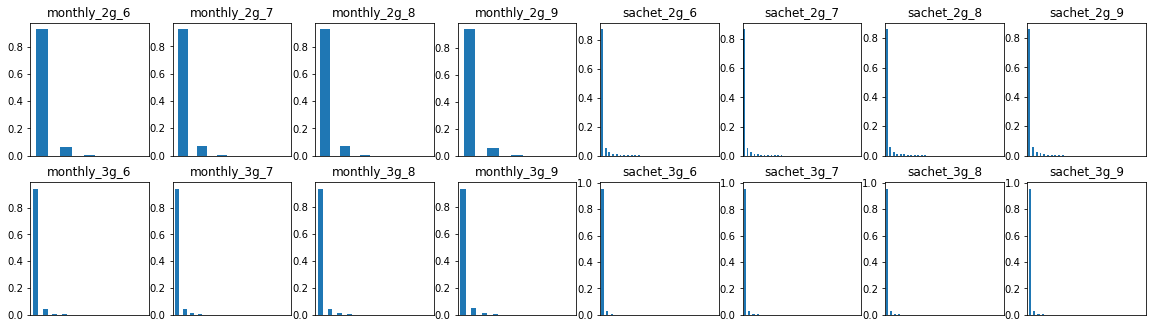

In [35]:
# Plotting categorical variables
plt.figure(figsize=(20,20))
for j in enumerate(mylist):
    plt.subplot(7,8,j[0]+1)
    df[j[1]].value_counts(normalize=True,dropna=False).plot(kind='bar')
    plt.xticks([])
    plt.title(j[1])
    

`Inference:` From the plot, the categorical columns are highly skewed and hence dropping them would be better.

In [36]:
#As per above bar graphs, mylist objects are highly skewed, hence droping the columns
df.drop(columns=mylist,inplace=True)

In [37]:
#for i in df.columns[df.columns.str.contains('total_rech_num')]:
#    df[i]=df[i].astype('object')

In [38]:
# Re-checking the shape after dropping categorical columns
df.shape

(99999, 141)

In [39]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 141 columns):
 #   Column            Dtype  
---  ------            -----  
 0   onnet_mou_6       float64
 1   onnet_mou_7       float64
 2   onnet_mou_8       float64
 3   onnet_mou_9       float64
 4   offnet_mou_6      float64
 5   offnet_mou_7      float64
 6   offnet_mou_8      float64
 7   offnet_mou_9      float64
 8   roam_ic_mou_6     float64
 9   roam_ic_mou_7     float64
 10  roam_ic_mou_8     float64
 11  roam_ic_mou_9     float64
 12  roam_og_mou_6     float64
 13  roam_og_mou_7     float64
 14  roam_og_mou_8     float64
 15  roam_og_mou_9     float64
 16  loc_og_t2t_mou_6  float64
 17  loc_og_t2t_mou_7  float64
 18  loc_og_t2t_mou_8  float64
 19  loc_og_t2t_mou_9  float64
 20  loc_og_t2m_mou_6  float64
 21  loc_og_t2m_mou_7  float64
 22  loc_og_t2m_mou_8  float64
 23  loc_og_t2m_mou_9  float64
 24  loc_og_t2f_mou_6  float64
 25  loc_og_t2f_mou_7  float64
 26  loc_og_t2f_mou_8 

### Filter High Value Customers

In [40]:
df.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,968,30.4,0.0,101.20,3.58
1,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,0.00,0.0,0.0,0.00,1.83,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,9,11,5,74,384,283,121,44,154,65,50,0.00,108.07,365.47,0.0,0.00,0.00,0.00,0.00,1006,0.0,0.0,0.00,0.00
2,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.0,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,26.49,22.58,8.76,41.81,67.41,75.53,9.28,1.48,14.76,22.83,0.0,47.64,108.68,120.94,18.04,0.0,0.0,0.0,0.0,46.56,236.84,96.84,42.08,0.45,0.0,0.0,0.0,155.33,412.94,285.46,124.94,115.69,71.11,67.46,148.23,14.38,15.44,38.89,38.98,99.48,122.29,49.63,158.19,229.56,208.86,155.99,345.41,72.41,71.29,28.69,49.44,45.18,177.01,1

In [41]:
# Finding average recharge amount in the good phase (month 6 and month 7)
df['hvc_rech']=(df.total_rech_amt_6 + df.total_rech_amt_7)/2

In [42]:
#Cut off for high valued customers with average recharge amount more than 70 percentile 
hv_cutoff=df.hvc_rech.quantile(0.7)

In [43]:
# Filtering customers who have average amount >= hv_cutoff and storing it in new dataframe
df_hvc=df[df.hvc_rech>=hv_cutoff]

In [44]:
# Checking the shape of new dataframe
df_hvc.shape

(30011, 142)

### Deriving the Churn Variable
- For deriving the churn model, usage based churn model will be used. Based on the usage, the customers will be tagged as churn(1) or non-churn(0).
- To do this, columns such as total_og_mou_9, total_ic_mou_9, vol_2g_mb_9, vol_3g_mb_9 are used.

In [45]:
# Initializing the the churn variable to 0.
df_hvc['churn']=0

In [46]:
# Based on the usage related columns updating the churn variable to 1.
df_hvc.loc[(df_hvc.total_ic_mou_9==0) & (df_hvc.total_og_mou_9==0) & (df_hvc.vol_2g_mb_9==0) & (df_hvc.vol_3g_mb_9==0),'churn']=1

In [47]:
# Checking the Churn Rate
df_hvc['churn'].value_counts(normalize=True)

0    0.913598
1    0.086402
Name: churn, dtype: float64

In [48]:
# columns related to month 9 are churn_phase_cols
churn_phase_cols = [col for col in df_hvc.columns if col.endswith('_9')]

In [49]:
# Dropping are churn_phase_cols
df_hvc.drop(columns=churn_phase_cols,inplace=True)

In [50]:
df_hvc.drop(columns=['hvc_rech'],inplace=True)

In [51]:
# Re-checking the shape after dropping
df_hvc.shape

(30011, 108)

In [52]:
# Re-checking the data set
df_hvc.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
7,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0.0,0.0,0.00,0.0,0.00,0.00,802,57.74,19.38,18.74,0.0,1
8,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,0.0,356.0,0.03,0.0,750.95,11.94,315,21.03,910.65,122.16,0.0,0
13,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,0.0,0.0,0.02,0.0,0.00,0.00,2607,0.00,0.00,0.00,0.0,0
16,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.00,0.00,0.00,30.89,67.09,21.53,0.0,0.00,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.00,2.18,87.99,151.73,82.44,364.86,381.56,294.46,0.00,0.0,0.0,0.00,0.00,0.23,0.00,0.00,0.00,10,6,2,570,348,160,110,110,130,0.0,0.0,0.00,0.0,0.00,0.00,511,0.00,2.45,21.89,0.0,0
17,1185.91,9.28,7.79,61.64,0.00,5.54,0.00

### Data Preparation

#### Outlier Treatment

In [53]:
# Checking for outliers using describe()
df_hvc.describe(percentiles=[0.8,0.9,0.95,0.99,0.995])

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
count,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,296.034461,304.343206,267.600412,417.933372,423.924375,375.021691,17.412764,13.522114,13.25627,29.321648,22.036003,21.469272,94.680696,95.729729,87.139995,181.279583,181.271524,167.591199,6.97933,7.097268,6.494314,1.567160,1.862229,1.712739,282.948414,284.107492,261.233938,189.753131,199.877508,172.196408,203.097767,213.411914,179.568790,2.010766,2.034241,1.789728,394.865994,415.327988,353.558826,2.264425,2.207400,2.029314,5.916364,7.425487,6.885193,0.692507,0.047600,0.059131,686.697541,709.124730,623.774684,68.749054,70.311351,65.936968,159.613810,160.813032,153.628517,15.595629,16.510023,14.706512,243.968340,247.644401,234.281577,16.229350,16.893723,15.051559,32.015163,33.477150,30.434765,2.874506,2.992948,2.680925,51.122992,53.36786,48.170990,307.512073,314.875472,295.426531,0.066731,0.018066,0.027660,11.156530,12.360190,11.700835,1.188803,1.476889,1.237756,12.121322,11.913465,10.225317,697.365833,695.962880,613.638799,171.414048,175.661058,162.869348,78.859009,78.171382,69.209105,258.392681,278.0937

In [54]:
# Creating the copy of the data frame
df_h=df_hvc.copy()

In [55]:
# Since there are outliers at the upper fence, handling them with 2% capping
for p in df_h.columns[:-1]:
    a=df_h[p].quantile(0.98)
    df_h[p][df_h[p]>a] = a 

In [56]:
# Displaying only 6th month data
df_h[df_h.columns[df_h.columns.str.endswith('6')]]

,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,og_others_6,total_og_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6,ic_others_6,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,vol_2g_mb_6,vol_3g_mb_6
7,57.84,453.43,16.23,23.74,51.39,308.63,62.13,0.00,422.16,4.30,49.89,6.66,60.86,0.0,4.50,0.00,487.53,58.14,217.56,132.06,427.88,36.89,91.440,30.022,180.540,626.46,0.21,2.06,10.84,5,1580,655,0.00,0.00
8,413.69,94.66,0.00,0.00,297.13,80.96,0.00,0.00,378.09,116.56,13.69,0.00,130.26,0.0,0.00,0.00,508.36,23.84,57.58,0.00,81.43,0.00,22.430,0.000,22.430,103.86,0.00,0.00,0.00,19,437,90,0.00,0.00
13,501.76,413.31,23.53,7.98,49.63,151.13,4.54,0.00,205.31,446.41,255.36,0.00,701.78,0.0,0.00,0.00,907.09,67.88,142.88,4.81,215.58,115.68,245.186,0.000,367.706,968.61,0.45,129.13,10.84,6,507,110,0.00,0.00
16,50.51,296.29,0.00,0.00,42.61,273.29,0.00,0.00,315.91,7.89,22.99,0.00,30.89,0.0,0.00,0.00,346.81,41.33,226.81,8.71,276.86,68.79,18.680,0.510,87.990,364.86,0.00,0.00,0.00,10,570,110,0.00,0.00
17,1185.91,61.64,0.00,0.00,38.99,58.54,0.00,0.00,97.54,1146.91,1.55,0.00,1148.46,0.0,2.58,0.93,1249.53,34.54,47.41,0.00,81.96,8.63,1.280,0.000,9.910,91.88,0.00,0.00,0.00,19,816,110,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99970,5.01,329.58,5.06,46.04,5.01,7.83,0.16,0.00,13.01,0.00,275.53,0.00,275.53,0.0,0.00,0.00,288.54,6.66,15.51,1.98,24.16,0.00,0.760,0.000,0.760,24.93,0.00,0.00,0.00,11,337,90,0.00,0.00
99974,17.56,428.41,0.00,0.00,10.11,403.08,2.71,0.00,415.91,0.00,20.46,9.59,30.06,0.0,2.18,3.08,451.24,8.96,90.28,1.20,100.44,0.00,6.030,11.330,17.360,117.81,0.00,0.00,0.00,8,520,120,0.00,0.00
99986,806.73,784.76,0.00,0.00,668.59,574.93,16.28,15.96,1300.43,97.51,186.88,0.00,284.39,0.0,15.96,0.00,1600.79,140.71,395.58,29.96,566.26,2.31,12.140,0.000,14.460,580.73,0.00,0.00,0.00,6,567,550,34.28,736.01
99988,199.89,175.88,0.00,0.00,170.28,137.83,0.00,0.00,308.11,29.61,38.04,0.00,67.66,0.0,0.00,0.00,375.78,47.56,245.31,14.43,307.31,10.08,245.186,1.010,367.706,998.96,0.00,0.00,0.20,12,380,50,0.00,0.00


In [57]:
# Displaying first 5 rows of 6th month
df_h[df_h.columns[df_h.columns.str.endswith('6')]].head()

,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,og_others_6,total_og_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6,ic_others_6,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,vol_2g_mb_6,vol_3g_mb_6
7,57.84,453.43,16.23,23.74,51.39,308.63,62.13,0.0,422.16,4.30,49.89,6.66,60.86,0.0,4.50,0.00,487.53,58.14,217.56,132.06,427.88,36.89,91.440,30.022,180.540,626.46,0.21,2.06,10.84,5,1580,655,0.0,0.0
8,413.69,94.66,0.00,0.00,297.13,80.96,0.00,0.0,378.09,116.56,13.69,0.00,130.26,0.0,0.00,0.00,508.36,23.84,57.58,0.00,81.43,0.00,22.430,0.000,22.430,103.86,0.00,0.00,0.00,19,437,90,0.0,0.0
13,501.76,413.31,23.53,7.98,49.63,151.13,4.54,0.0,205.31,446.41,255.36,0.00,701.78,0.0,0.00,0.00,907.09,67.88,142.88,4.81,215.58,115.68,245.186,0.000,367.706,968.61,0.45,129.13,10.84,6,507,110,0.0,0.0
16,50.51,296.29,0.00,0.00,42.61,273.29,0.00,0.0,315.91,7.89,22.99,0.00,30.89,0.0,0.00,0.00,346.81,41.33,226.81,8.71,276.86,68.79,18.680,0.510,87.990,364.86,0.00,0.00,0.00,10,570,110,0.0,0.0
17,1185.91,61.64,0.00,0.00,38.99,58.54,0.00,0.0,97.54,1146.91,1.55,0.00,1148.46,0.0,2.58,0.93,1249.53,34.54,47.41,0.00,81.96,8.63,1.280,0.000,9.910,91.88,0.00,0.00,0.00,19,816,110,0.0,0.0


In [58]:
# DERIVED 3 new comuns for t2t, t2m, t2f for outgoing calls
#df_h['og_t2t_mou_6'] = df_h.loc_og_t2t_mou_6+df_h.std_og_t2t_mou_6
#df_h['og_t2m_mou_6'] = df_h.loc_og_t2m_mou_6+df_h.std_og_t2m_mou_6
#df_h['og_t2f_mou_6'] = df_h.loc_og_t2f_mou_6+df_h.std_og_t2f_mou_6

In [59]:
#df_h['og_t2t_mou_7'] = df_h.loc_og_t2t_mou_7+df_h.std_og_t2t_mou_7
#df_h['og_t2m_mou_7'] = df_h.loc_og_t2m_mou_7+df_h.std_og_t2m_mou_7
#df_h['og_t2f_mou_7'] = df_h.loc_og_t2f_mou_7+df_h.std_og_t2f_mou_7

In [60]:
#df_h['og_t2t_mou_8'] = df_h.loc_og_t2t_mou_8+df_h.std_og_t2t_mou_8
#df_h['og_t2m_mou_8'] = df_h.loc_og_t2m_mou_8+df_h.std_og_t2m_mou_8
#df_h['og_t2f_mou_8'] = df_h.loc_og_t2f_mou_8+df_h.std_og_t2f_mou_8

In [61]:
#df_h.drop(columns=['loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8'],inplace=True)

In [62]:
#df_h.drop(columns=['loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8'],inplace=True)
#df_h.drop(columns=['loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8'],inplace=True)

In [63]:
df_h[df_h.columns[df_h.columns.str.endswith('6')]].head()

,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,og_others_6,total_og_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6,ic_others_6,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,vol_2g_mb_6,vol_3g_mb_6
7,57.84,453.43,16.23,23.74,51.39,308.63,62.13,0.0,422.16,4.30,49.89,6.66,60.86,0.0,4.50,0.00,487.53,58.14,217.56,132.06,427.88,36.89,91.440,30.022,180.540,626.46,0.21,2.06,10.84,5,1580,655,0.0,0.0
8,413.69,94.66,0.00,0.00,297.13,80.96,0.00,0.0,378.09,116.56,13.69,0.00,130.26,0.0,0.00,0.00,508.36,23.84,57.58,0.00,81.43,0.00,22.430,0.000,22.430,103.86,0.00,0.00,0.00,19,437,90,0.0,0.0
13,501.76,413.31,23.53,7.98,49.63,151.13,4.54,0.0,205.31,446.41,255.36,0.00,701.78,0.0,0.00,0.00,907.09,67.88,142.88,4.81,215.58,115.68,245.186,0.000,367.706,968.61,0.45,129.13,10.84,6,507,110,0.0,0.0
16,50.51,296.29,0.00,0.00,42.61,273.29,0.00,0.0,315.91,7.89,22.99,0.00,30.89,0.0,0.00,0.00,346.81,41.33,226.81,8.71,276.86,68.79,18.680,0.510,87.990,364.86,0.00,0.00,0.00,10,570,110,0.0,0.0
17,1185.91,61.64,0.00,0.00,38.99,58.54,0.00,0.0,97.54,1146.91,1.55,0.00,1148.46,0.0,2.58,0.93,1249.53,34.54,47.41,0.00,81.96,8.63,1.280,0.000,9.910,91.88,0.00,0.00,0.00,19,816,110,0.0,0.0


In [64]:
# DERIVED 3 new comuns for t2t, t2m, t2f for incoming
#df_h['ic_t2t_mou_6'] = df_h.loc_ic_t2t_mou_6+df_h.std_ic_t2t_mou_6
#df_h['ic_t2m_mou_6'] = df_h.loc_ic_t2m_mou_6+df_h.std_ic_t2m_mou_6
#df_h['ic_t2f_mou_6'] = df_h.loc_ic_t2f_mou_6+df_h.std_ic_t2f_mou_6
#df_h['ic_t2t_mou_7'] = df_h.loc_ic_t2t_mou_7+df_h.std_ic_t2t_mou_7
#df_h['ic_t2m_mou_7'] = df_h.loc_ic_t2m_mou_7+df_h.std_ic_t2m_mou_7
#df_h['ic_t2f_mou_7'] = df_h.loc_ic_t2f_mou_7+df_h.std_ic_t2f_mou_7
#df_h['ic_t2t_mou_8'] = df_h.loc_ic_t2t_mou_8+df_h.std_ic_t2t_mou_8
#df_h['ic_t2m_mou_8'] = df_h.loc_ic_t2m_mou_8+df_h.std_ic_t2m_mou_8
#df_h['ic_t2f_mou_8'] = df_h.loc_ic_t2f_mou_8+df_h.std_ic_t2f_mou_8

In [65]:
#df_h.drop(columns=['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8'],inplace=True)
#df_h.drop(columns=['loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8'],inplace=True)
#df_h.drop(columns=['loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8'],inplace=True)

In [66]:
df_h[df_h.columns[df_h.columns.str.endswith('6')]].head()

,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,og_others_6,total_og_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6,ic_others_6,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,vol_2g_mb_6,vol_3g_mb_6
7,57.84,453.43,16.23,23.74,51.39,308.63,62.13,0.0,422.16,4.30,49.89,6.66,60.86,0.0,4.50,0.00,487.53,58.14,217.56,132.06,427.88,36.89,91.440,30.022,180.540,626.46,0.21,2.06,10.84,5,1580,655,0.0,0.0
8,413.69,94.66,0.00,0.00,297.13,80.96,0.00,0.0,378.09,116.56,13.69,0.00,130.26,0.0,0.00,0.00,508.36,23.84,57.58,0.00,81.43,0.00,22.430,0.000,22.430,103.86,0.00,0.00,0.00,19,437,90,0.0,0.0
13,501.76,413.31,23.53,7.98,49.63,151.13,4.54,0.0,205.31,446.41,255.36,0.00,701.78,0.0,0.00,0.00,907.09,67.88,142.88,4.81,215.58,115.68,245.186,0.000,367.706,968.61,0.45,129.13,10.84,6,507,110,0.0,0.0
16,50.51,296.29,0.00,0.00,42.61,273.29,0.00,0.0,315.91,7.89,22.99,0.00,30.89,0.0,0.00,0.00,346.81,41.33,226.81,8.71,276.86,68.79,18.680,0.510,87.990,364.86,0.00,0.00,0.00,10,570,110,0.0,0.0
17,1185.91,61.64,0.00,0.00,38.99,58.54,0.00,0.0,97.54,1146.91,1.55,0.00,1148.46,0.0,2.58,0.93,1249.53,34.54,47.41,0.00,81.96,8.63,1.280,0.000,9.910,91.88,0.00,0.00,0.00,19,816,110,0.0,0.0


#### EDA

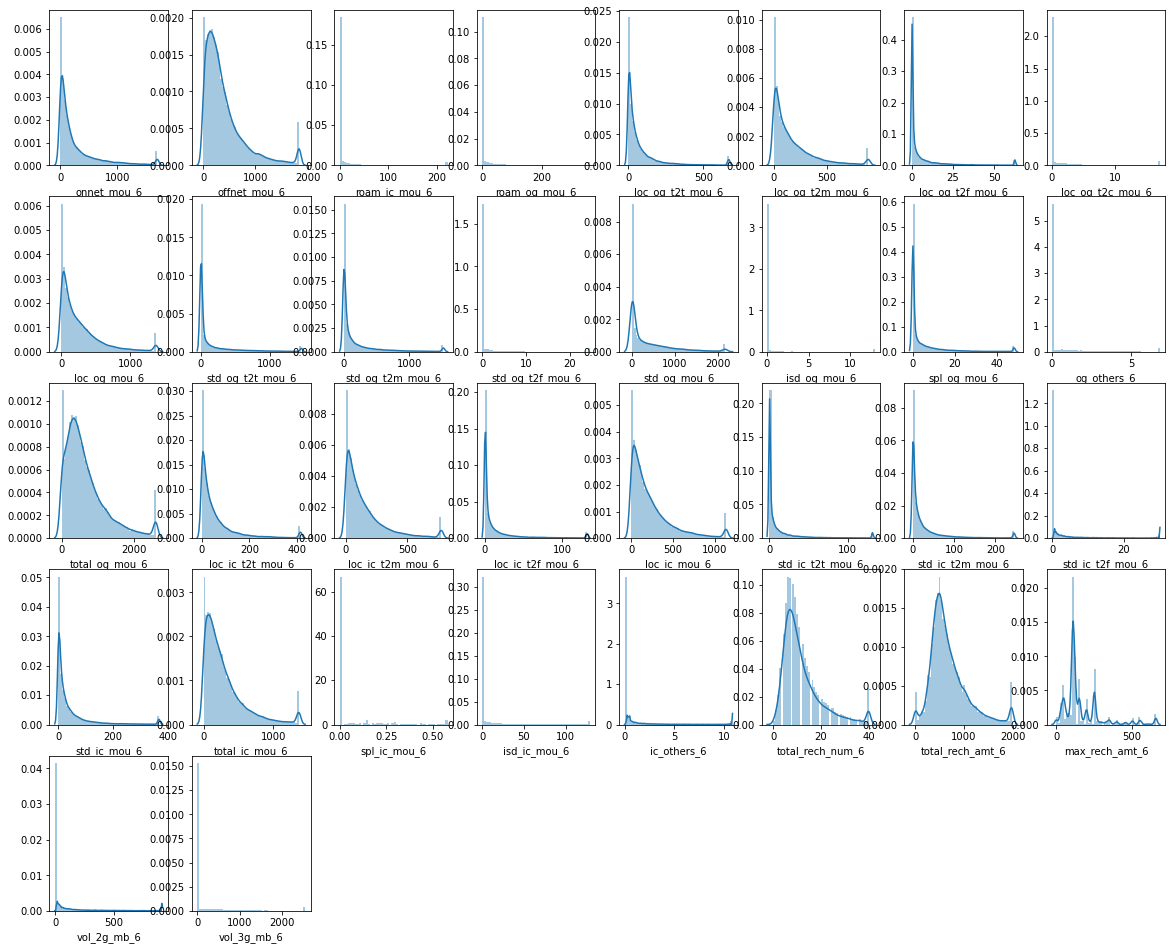

In [67]:
# plotting the distribution of data fro the month 6
plt.figure(figsize=(20,20))
for j in enumerate(df_h[df_h.columns[df_h.columns.str.endswith('6')]].columns):
    plt.subplot(6,8,j[0]+1)
    sns.distplot(df_h[j[1]])   

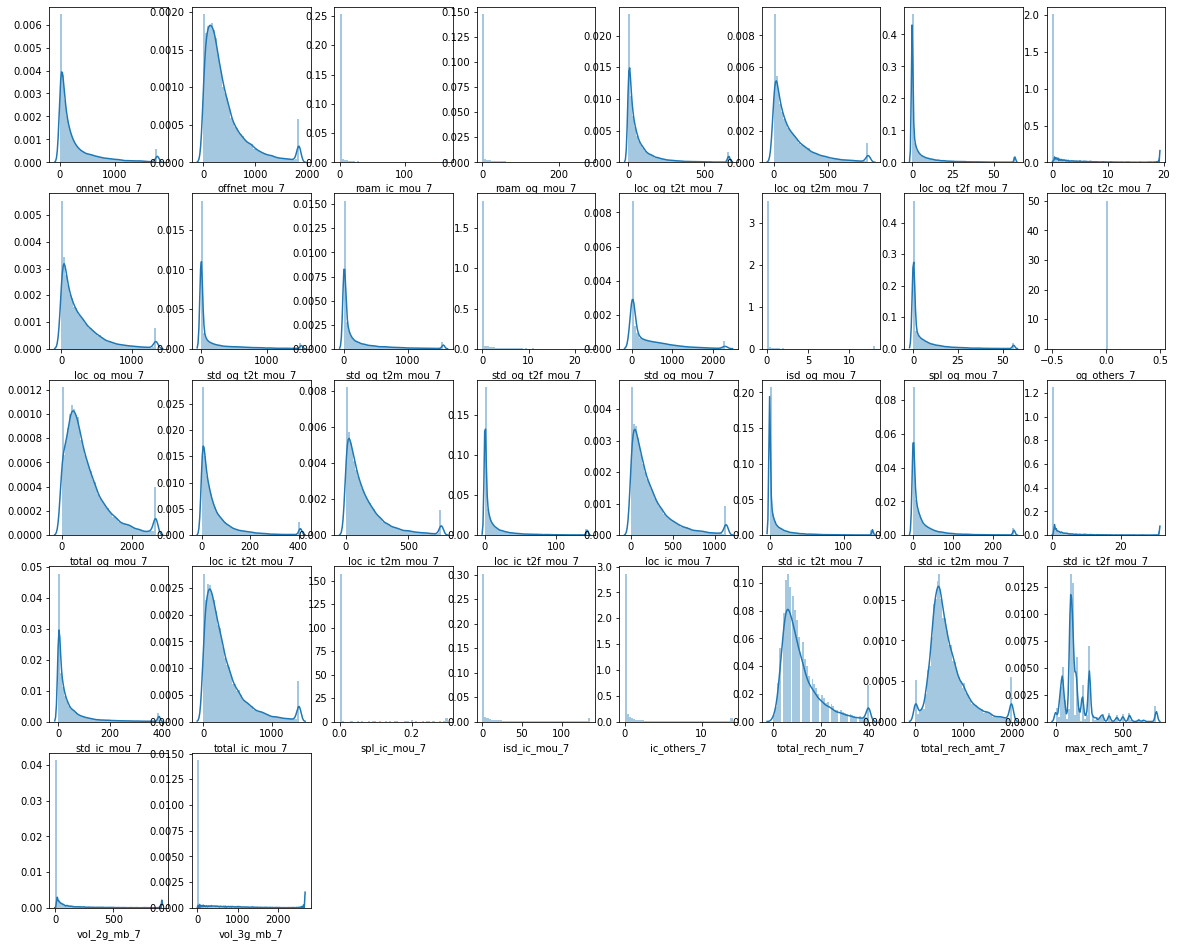

In [68]:
# plotting the distribution of data fro the month 7
plt.figure(figsize=(20,20))
for j in enumerate(df_h[df_h.columns[df_h.columns.str.endswith('7')]].columns):
    plt.subplot(6,8,j[0]+1)
    sns.distplot(df_h[j[1]])   

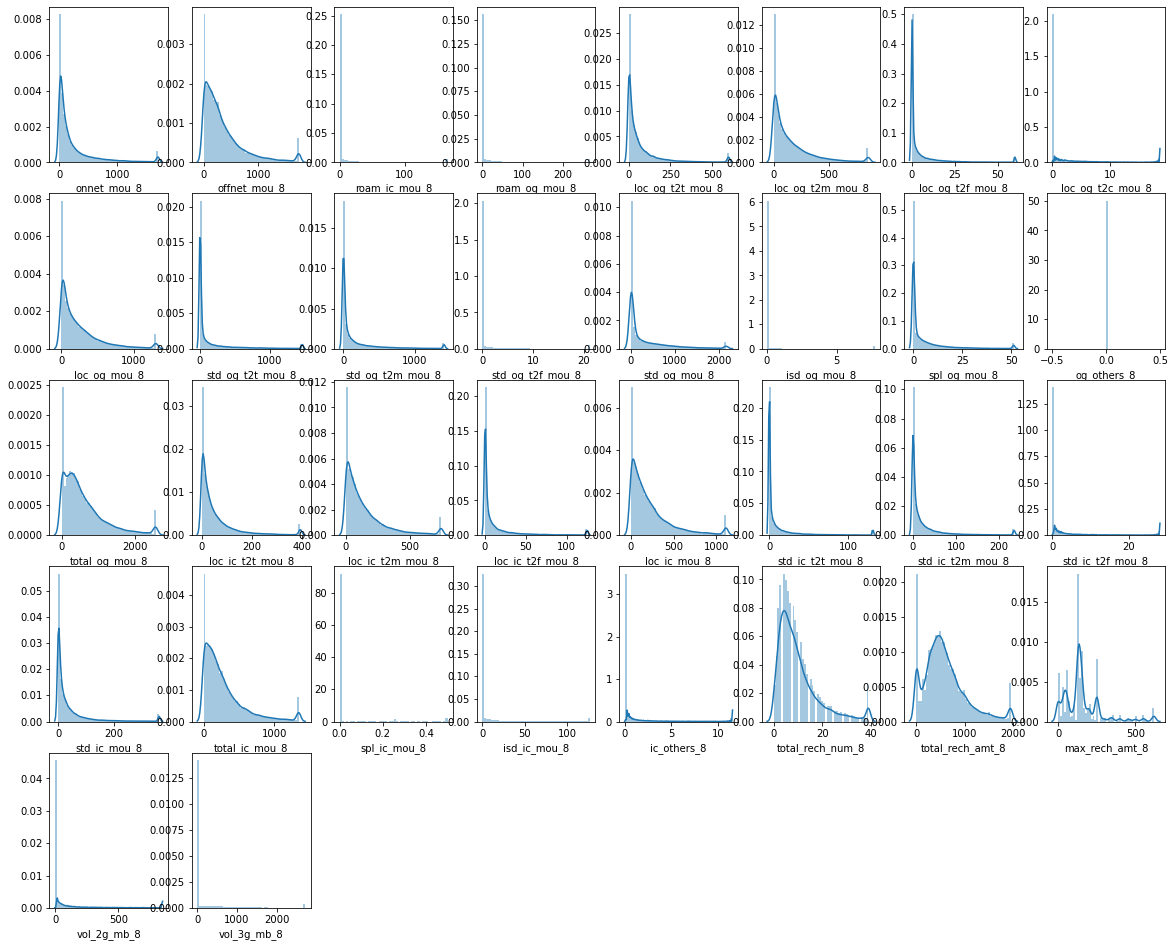

In [69]:
# plotting the distribution of data fro the month 8
plt.figure(figsize=(20,20))
for j in enumerate(df_h[df_h.columns[df_h.columns.str.endswith('8')]].columns):
    plt.subplot(6,8,j[0]+1)
    sns.distplot(df_h[j[1]])  

`Inference:` From the above plots for the months 6, 7, and 8, most of the columns are skewed and hence has to be dropped.

In [70]:
# Dropping such skewed columns from the above plots for all the 3 months.
df_h.drop(columns=['roam_ic_mou_6','roam_og_mou_6','loc_og_t2c_mou_6','std_og_t2f_mou_6','isd_og_mou_6','og_others_6','std_ic_t2f_mou_6','spl_ic_mou_6','isd_ic_mou_6','ic_others_6','max_rech_amt_6','vol_2g_mb_6','vol_3g_mb_6'],inplace=True)
df_h.drop(columns=['roam_ic_mou_7','roam_og_mou_7','loc_og_t2c_mou_7','std_og_t2f_mou_7','isd_og_mou_7','og_others_7','std_ic_t2f_mou_7','spl_ic_mou_7','isd_ic_mou_7','ic_others_7','max_rech_amt_7','vol_2g_mb_7','vol_3g_mb_7'],inplace=True)
df_h.drop(columns=['roam_ic_mou_8','roam_og_mou_8','loc_og_t2c_mou_8','std_og_t2f_mou_8','isd_og_mou_8','og_others_8','std_ic_t2f_mou_8','spl_ic_mou_8','isd_ic_mou_8','ic_others_8','max_rech_amt_8','vol_2g_mb_8','vol_3g_mb_8'],inplace=True)

In [71]:
# After dropping, checking the data related to month 6
df_h[df_h.columns[df_h.columns.str.endswith('6')]].head()

,onnet_mou_6,offnet_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_mou_6,spl_og_mou_6,total_og_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_mou_6,total_ic_mou_6,total_rech_num_6,total_rech_amt_6
7,57.84,453.43,51.39,308.63,62.13,422.16,4.30,49.89,60.86,4.50,487.53,58.14,217.56,132.06,427.88,36.89,91.440,180.540,626.46,5,1580
8,413.69,94.66,297.13,80.96,0.00,378.09,116.56,13.69,130.26,0.00,508.36,23.84,57.58,0.00,81.43,0.00,22.430,22.430,103.86,19,437
13,501.76,413.31,49.63,151.13,4.54,205.31,446.41,255.36,701.78,0.00,907.09,67.88,142.88,4.81,215.58,115.68,245.186,367.706,968.61,6,507
16,50.51,296.29,42.61,273.29,0.00,315.91,7.89,22.99,30.89,0.00,346.81,41.33,226.81,8.71,276.86,68.79,18.680,87.990,364.86,10,570
17,1185.91,61.64,38.99,58.54,0.00,97.54,1146.91,1.55,1148.46,2.58,1249.53,34.54,47.41,0.00,81.96,8.63,1.280,9.910,91.88,19,816


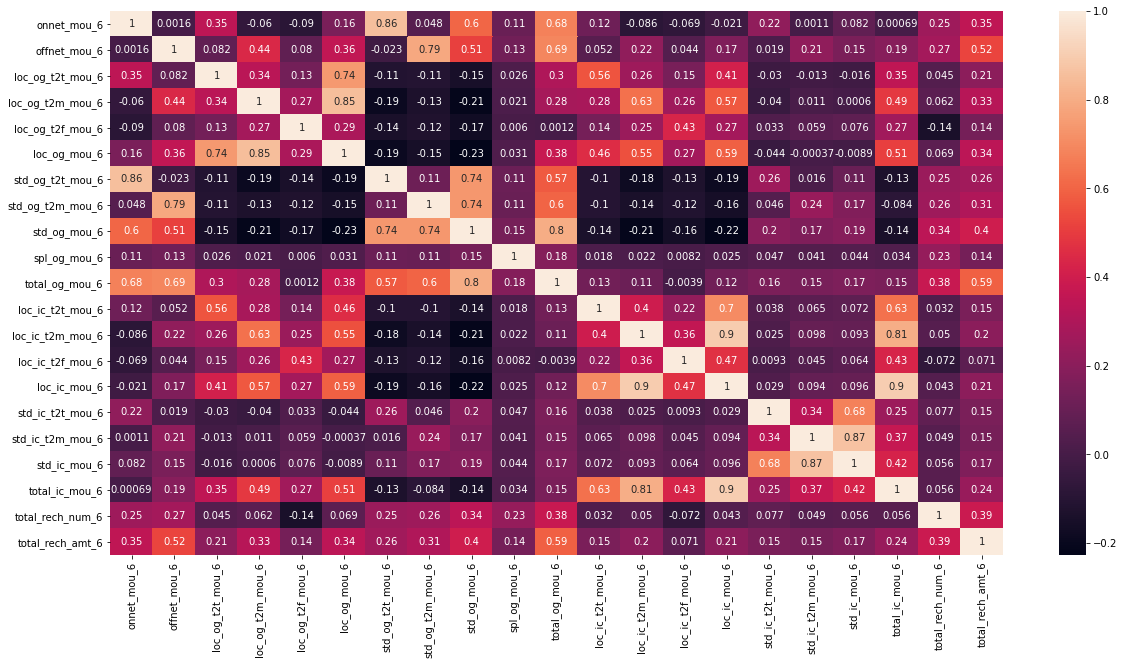

In [72]:
# To check the correlation among month 6 related varibles
plt.figure(figsize=(20,10))
sns.heatmap(df_h[df_h.columns[df_h.columns.str.endswith('6')]].corr(),annot=True)

plt.show()

`Inference:` Some of the variables are having higher correlation such as onnet_mou_6, offnet_mou_6, loc_og_mou_6, total_og_mou_6, loc_ic_mou_6, std_og_mou_6, std_ic_mou_, total_ic_mou_6, so we will drop them as it might lead to multi-collinearity problem.

In [73]:
# Dropping highly correlated month 6 related variables
df_h.drop(columns=['onnet_mou_6','offnet_mou_6','loc_og_mou_6','total_og_mou_6','loc_ic_mou_6','std_og_mou_6','std_ic_mou_6','total_ic_mou_6'],inplace=True)

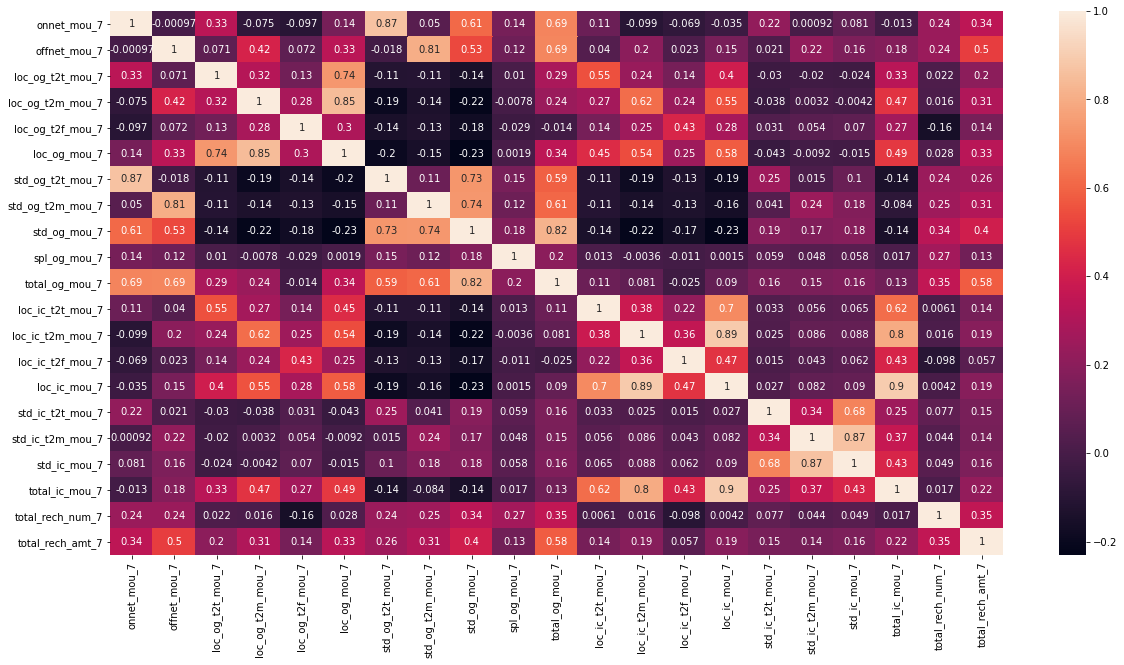

In [74]:
# To check the correlation among month 7 related varibles
plt.figure(figsize=(20,10))
sns.heatmap(df_h[df_h.columns[df_h.columns.str.endswith('7')]].corr(),annot=True)

plt.show()

`Inference:` Some of the variables are having higher correlation such as onnet_mou_7, offnet_mou_7, loc_og_mou_7, total_og_mou_7, loc_ic_mou_7, std_og_mou_7, std_ic_mou_7, total_ic_mou_7, so we will drop them as it might lead to multi-collinearity problem.

In [75]:
# Dropping highly correlated month 7 related variables
df_h.drop(columns=['onnet_mou_7','offnet_mou_7','loc_og_mou_7','total_og_mou_7','loc_ic_mou_7','std_og_mou_7','std_ic_mou_7','total_ic_mou_7'],inplace=True)

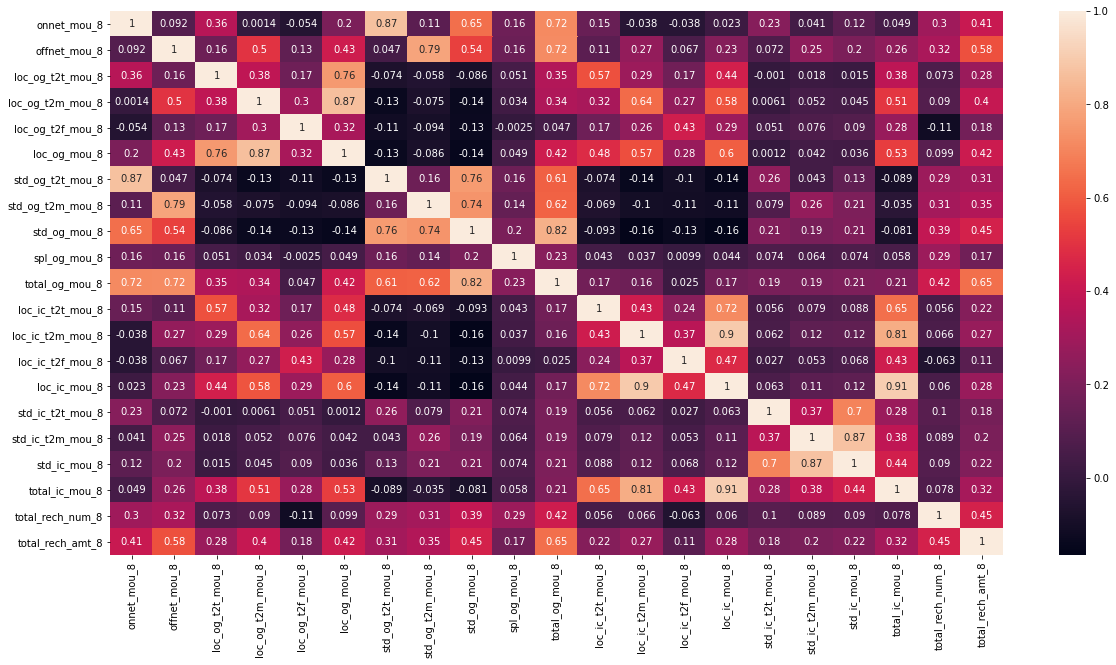

In [76]:
# To check the correlation among month 8 related varibles
plt.figure(figsize=(20,10))
sns.heatmap(df_h[df_h.columns[df_h.columns.str.endswith('8')]].corr(),annot=True)

plt.show()

`Inference:` Some of the variables are having higher correlation such as onnet_mou_8, offnet_mou_8, loc_og_mou_8, total_og_mou_8, loc_ic_mou_8, std_og_mou_8, std_ic_mou_8, total_ic_mou_8, so we will drop them as it might lead to multi-collinearity problem.

In [77]:
# Dropping highly correlated month 8 related variables
df_h.drop(columns=['onnet_mou_8','offnet_mou_8','loc_og_mou_8','total_og_mou_8','loc_ic_mou_8','std_og_mou_8','std_ic_mou_8','total_ic_mou_8'],inplace=True)

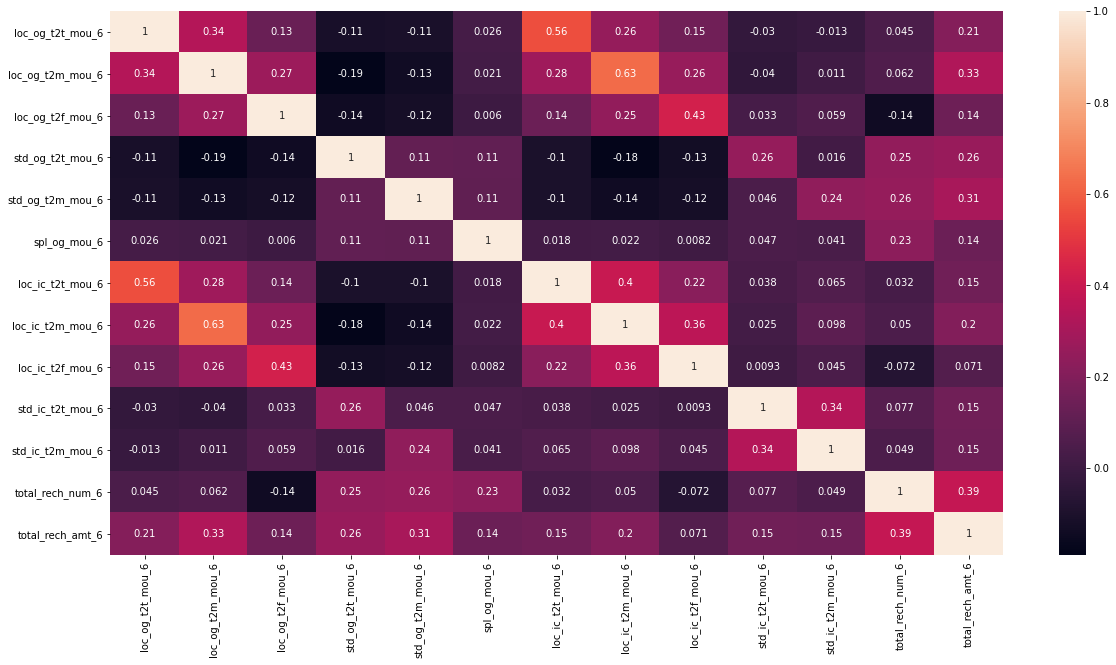

In [78]:
# Re-check the correlation among month 6 related varibles after dropping highly correlated variables
plt.figure(figsize=(20,10))
sns.heatmap(df_h[df_h.columns[df_h.columns.str.endswith('6')]].corr(),annot=True)

plt.show()

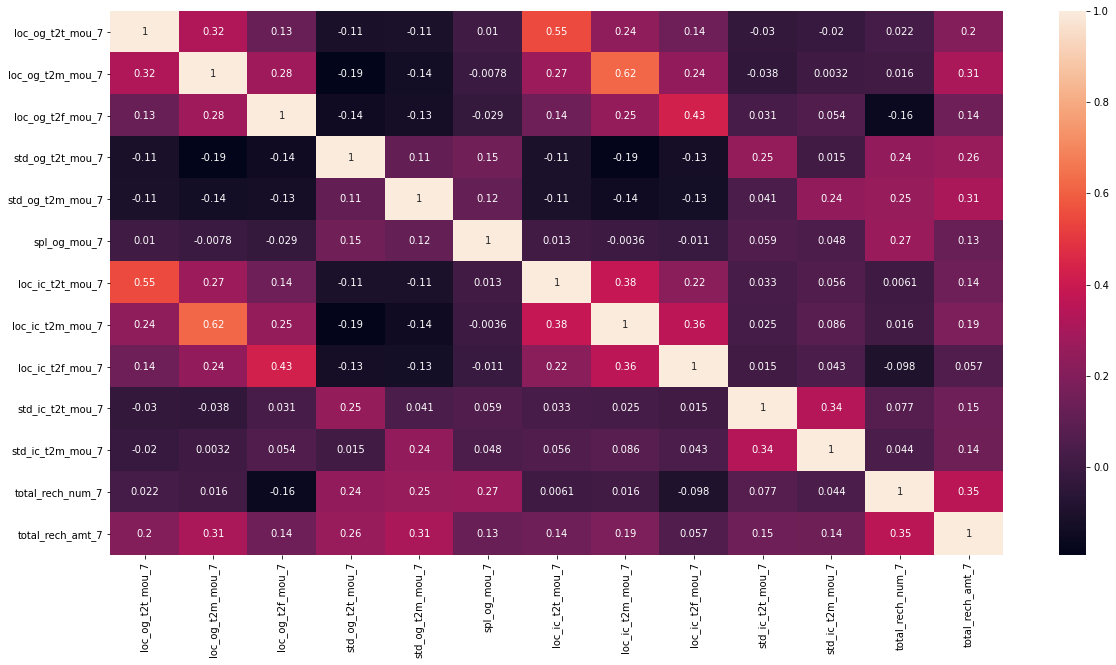

In [79]:
# Re-check the correlation among month 7 related varibles after dropping highly correlated variables
plt.figure(figsize=(20,10))
sns.heatmap(df_h[df_h.columns[df_h.columns.str.endswith('7')]].corr(),annot=True)

plt.show()

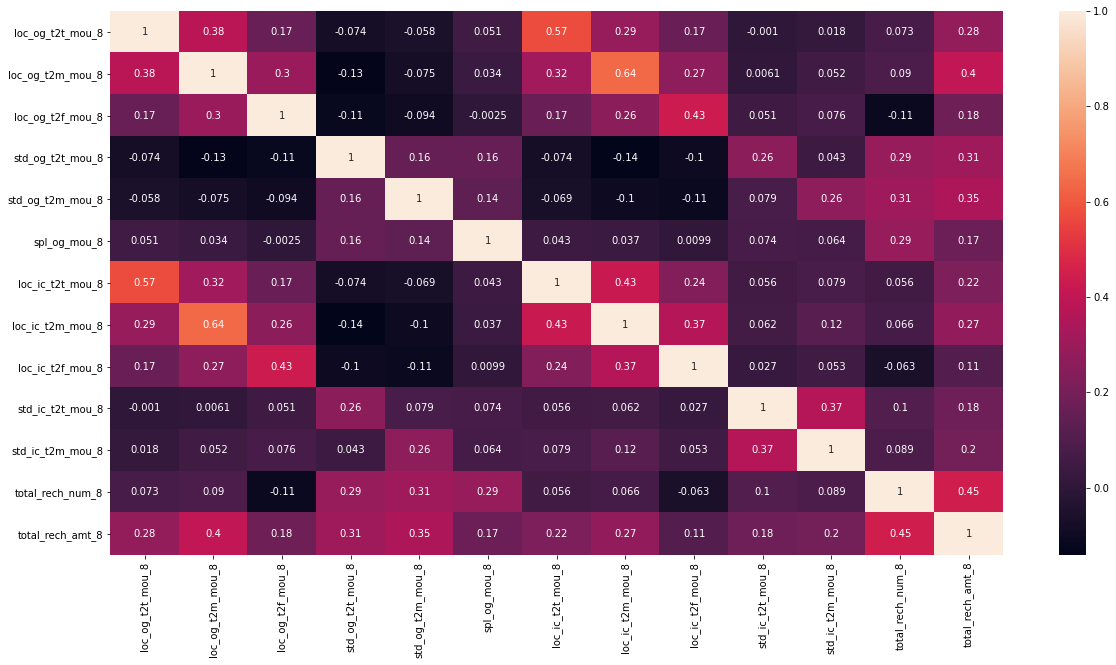

In [80]:
# Re-check the correlation among month 8 related varibles after dropping highly correlated variables
plt.figure(figsize=(20,10))
sns.heatmap(df_h[df_h.columns[df_h.columns.str.endswith('8')]].corr(),annot=True)

plt.show()

`Inference:` Above heatmaps are obtained after dropping highly correlated variables related to month 6, 7, and 8 respectively and now the correlation between the variables is better than before. Certain variables are still correlated but we want the  model to decide about it and choose better variables.

#### Derived Variables

In [ ]:
# Deriving variables from columns related to 6th and 7th month by taking their average.
for i in df_h.columns[df_h.columns.str.endswith('6')]:
    df_h[i[:-1]+'g']=(df_h[i[:-1]+'6']+df_h[i[:-1]+'7'])/2

In [82]:
# Dropping the columns related to month 6 and 7 from which derived variables were created.
df_h.drop(columns=df_h.columns[df_h.columns.str.endswith('6')],inplace=True)
df_h.drop(columns=df_h.columns[df_h.columns.str.endswith('7')],inplace=True)

In [83]:
# Checking the shape again
df_h.shape

(30011, 32)

In [84]:
# Checking the data set again
df_h.head()

,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,spl_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,total_rech_num_8,total_rech_amt_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,loc_og_t2t_mou_g,loc_og_t2m_mou_g,loc_og_t2f_mou_g,std_og_t2t_mou_g,std_og_t2m_mou_g,spl_og_mou_g,loc_ic_t2t_mou_g,loc_ic_t2m_mou_g,loc_ic_t2f_mou_g,std_ic_t2t_mou_g,std_ic_t2m_mou_g,total_rech_num_g,total_rech_amt_g
7,40.28,162.28,53.23,12.01,49.14,6.50,27.31,121.19,39.53,30.39,141.33,7,1957.8,802,57.74,19.38,18.74,0.0,1,41.385,378.005,58.635,13.795,40.825,2.25,45.200,219.525,116.760,24.360,109.215,5.0,1185.0
8,12.49,50.54,0.00,22.58,75.69,10.23,0.31,15.48,0.00,0.10,0.65,14,120.0,315,21.03,910.65,122.16,0.0,0,257.360,75.770,0.000,124.995,11.865,0.00,16.840,35.780,0.000,0.290,13.255,20.0,519.0
13,36.01,294.46,23.51,498.23,156.94,4.78,52.58,195.18,7.49,131.28,234.79,11,717.0,2607,0.00,0.00,0.00,0.0,0,27.910,99.205,2.270,266.195,154.150,0.00,37.730,80.705,2.405,76.985,137.488,5.0,380.0
16,67.38,128.28,10.26,3.23,18.29,5.91,28.89,150.16,32.71,6.33,73.93,2,160.0,511,0.00,2.45,21.89,0.0,0,53.885,209.640,2.240,5.235,43.750,1.63,56.385,188.250,8.695,73.715,45.880,8.0,459.0
17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,30.0,667,0.00,0.00,0.00,0.0,0,19.495,29.270,0.000,573.860,0.775,1.29,17.270,24.860,0.000,4.315,0.640,10.5,408.0


In [85]:
#log transformation
for i in df_h.drop(columns='churn').columns:
    df_h[i]=np.log(df_h[i])

In [86]:
# Checking the dataframe after the transformation
df_h.head()

,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,spl_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,total_rech_num_8,total_rech_amt_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,loc_og_t2t_mou_g,loc_og_t2m_mou_g,loc_og_t2f_mou_g,std_og_t2t_mou_g,std_og_t2m_mou_g,spl_og_mou_g,loc_ic_t2t_mou_g,loc_ic_t2m_mou_g,loc_ic_t2f_mou_g,std_ic_t2t_mou_g,std_ic_t2m_mou_g,total_rech_num_g,total_rech_amt_g
7,3.695855,5.089323,3.974622,2.485740,3.894673,1.871802,3.307253,4.797360,3.677060,3.414114,4.951098,1.945910,7.579577,6.687109,4.05595,2.964242,2.930660,-inf,1,3.722918,5.934907,4.071332,2.624306,3.709295,0.810930,3.811097,5.391466,4.760121,3.192942,4.693318,1.609438,7.077498
8,2.524928,3.922765,-inf,3.117065,4.326646,2.325325,-1.171183,2.739549,-inf,-2.302585,-0.430783,2.639057,4.787492,5.752573,3.04595,6.814159,4.805332,-inf,0,5.550476,4.327702,-inf,4.828274,2.473593,-inf,2.823757,3.577389,-inf,-1.237874,2.584375,2.995732,6.251904
13,3.583797,5.685143,3.157426,6.211062,5.055864,1.564441,3.962336,5.273922,2.013569,4.877332,5.458691,2.397895,6.575076,7.865955,-inf,-inf,-inf,-inf,0,3.328985,4.597188,0.819780,5.584229,5.037926,-inf,3.630456,4.390801,0.877550,4.343611,4.923537,1.609438,5.940171
16,4.210348,4.854215,2.328253,1.172482,2.906354,1.776646,3.363496,5.011701,3.487681,1.845300,4.303119,0.693147,5.075174,6.236370,-inf,0.896088,3.086030,-inf,0,3.986852,5.345392,0.806476,1.655367,3.778492,0.488580,4.032203,5.237771,2.162748,4.300206,3.826029,2.079442,6.129050
17,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,1.386294,3.401197,6.502790,-inf,-inf,-inf,-inf,0,2.970158,3.376563,-inf,6.352385,-0.254892,0.254642,2.848971,3.213260,-inf,1.462097,-0.446287,2.351375,6.011267


In [87]:
# after conversion, log(0) value converted to -inf, so replacing that value 0

for i in df_h.drop(columns='churn').columns:
    df_h.loc[df_h[i]==np.log(0),i]=0


In [88]:
# Checking the dataframe after the changes
df_h.head()

,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,spl_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,total_rech_num_8,total_rech_amt_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,loc_og_t2t_mou_g,loc_og_t2m_mou_g,loc_og_t2f_mou_g,std_og_t2t_mou_g,std_og_t2m_mou_g,spl_og_mou_g,loc_ic_t2t_mou_g,loc_ic_t2m_mou_g,loc_ic_t2f_mou_g,std_ic_t2t_mou_g,std_ic_t2m_mou_g,total_rech_num_g,total_rech_amt_g
7,3.695855,5.089323,3.974622,2.485740,3.894673,1.871802,3.307253,4.797360,3.677060,3.414114,4.951098,1.945910,7.579577,6.687109,4.05595,2.964242,2.930660,0.0,1,3.722918,5.934907,4.071332,2.624306,3.709295,0.810930,3.811097,5.391466,4.760121,3.192942,4.693318,1.609438,7.077498
8,2.524928,3.922765,0.000000,3.117065,4.326646,2.325325,-1.171183,2.739549,0.000000,-2.302585,-0.430783,2.639057,4.787492,5.752573,3.04595,6.814159,4.805332,0.0,0,5.550476,4.327702,0.000000,4.828274,2.473593,0.000000,2.823757,3.577389,0.000000,-1.237874,2.584375,2.995732,6.251904
13,3.583797,5.685143,3.157426,6.211062,5.055864,1.564441,3.962336,5.273922,2.013569,4.877332,5.458691,2.397895,6.575076,7.865955,0.00000,0.000000,0.000000,0.0,0,3.328985,4.597188,0.819780,5.584229,5.037926,0.000000,3.630456,4.390801,0.877550,4.343611,4.923537,1.609438,5.940171
16,4.210348,4.854215,2.328253,1.172482,2.906354,1.776646,3.363496,5.011701,3.487681,1.845300,4.303119,0.693147,5.075174,6.236370,0.00000,0.896088,3.086030,0.0,0,3.986852,5.345392,0.806476,1.655367,3.778492,0.488580,4.032203,5.237771,2.162748,4.300206,3.826029,2.079442,6.129050
17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.386294,3.401197,6.502790,0.00000,0.000000,0.000000,0.0,0,2.970158,3.376563,0.000000,6.352385,-0.254892,0.254642,2.848971,3.213260,0.000000,1.462097,-0.446287,2.351375,6.011267


In [89]:
# Checking shape again
df_h.shape

(30011, 32)

In [90]:
# Checking the churn rate again after the transformation
df_h.churn.value_counts(normalize=True)

0    0.913598
1    0.086402
Name: churn, dtype: float64

## EDA

#### Bivariate Analysis

In [91]:
# Converting the churn variable to categorical
df_h.churn=df_h.churn.astype('object')

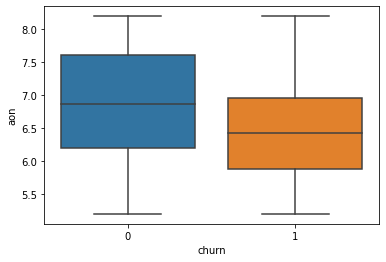

In [92]:
# Inspecting age on network variable wrt churn
sns.boxplot(y='aon',data=df_h,orient='v',x='churn')

`Inference:` Looks like non-churn customers are using the network operator for more days when compared to the churn customers. Also the median and IQR range are better for non-churn customers for the same.

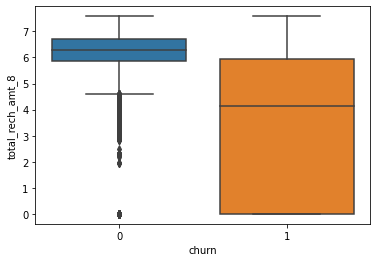

In [93]:
# Inspecting total_rech_amt_8 variable wrt churn
sns.boxplot(y='total_rech_amt_8',data=df_h,orient='v',x='churn')

`Inference:` During the action phase the non-churn customers are looking for low-cost recharge packages as they might be planning/thinking to churn and hence the total amount of recharge for non-churn is between 0 and 6 (considering IQR) whereas for churn its between 5.5 and 7 (considering IQR) as they want to use current network operator.

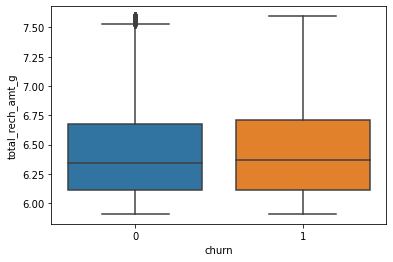

In [94]:
# Inspecting total_rech_amt_g variable wrt churn
sns.boxplot(y='total_rech_amt_g',data=df_h,orient='v',x='churn')

`Inference:` During the good phase there is no much difference with respect to recharge amount between churn or non-churn customers.

ValueError: Could not interpret input 'total_og_mou_g'

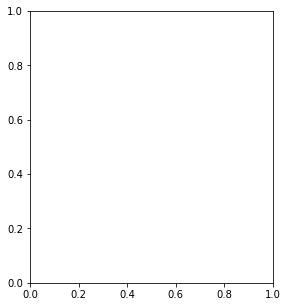

In [95]:
# comparison between good and action phase of total og, total ic
plt.figure(figsize = [20,5])

plt.subplot(1,4,1)
sns.boxplot(x = 'churn', y = 'total_og_mou_g', data = df_h)
plt.title('OG_Good_Phase')
plt.subplot(1,4,2)
sns.boxplot(x = 'churn', y = 'total_og_mou_8', data = df_h)
plt.title('OG_Action_Phase')

plt.subplot(1,4,3)
sns.boxplot(x = 'churn', y = 'total_ic_mou_g', data = df_h)
plt.title('IC_Good_Phase')
plt.subplot(1,4,4)
sns.boxplot(x = 'churn', y = 'total_ic_mou_8', data = df_h)
plt.title('IC_Action_Phase')

`Inferences:` The minutes of usage of churn customers during the action phase are more when ccompared to minutes of usage in good phase.

In [ ]:
# comparison between good and action phase of total 2g and total 3g data
plt.figure(figsize = [20,5])

plt.subplot(1,4,1)
sns.boxplot(x = 'churn', y = 'vol_2g_mb_g', data = df_h)
plt.title('Vol_2g_Good_Phase')
plt.subplot(1,4,2)
sns.boxplot(x = 'churn', y = 'vol_2g_mb_8', data = df_h)
plt.title('Vol_2g_Action_Phase')

plt.subplot(1,4,3)
sns.boxplot(x = 'churn', y = 'vol_3g_mb_g', data = df_h)
plt.title('Vol_3g_Good_Phase')
plt.subplot(1,4,4)
sns.boxplot(x = 'churn', y = 'vol_3g_mb_8', data = df_h)
plt.title('Vol_3g_Action_Phase')

`Inferences:` 
1. The volume of 2g data for churn and non-churn customers during the action phase is less when compared to good phase which might indicate that few customers are unhappy with the data service.
2. Also in 3g data, the IQR for non-churn is reduced in action phase when compared to good phase.

In [ ]:
# comparison between good and action phase of total 2g and total 3g data
plt.figure(figsize = [20,5])

plt.subplot(1,4,1)
sns.boxplot(x = 'churn', y = 'jun_vbc_3g', data = df_h)
plt.subplot(1,4,2)
sns.boxplot(x = 'churn', y = 'jul_vbc_3g', data = df_h)
plt.subplot(1,4,3)
sns.boxplot(x = 'churn', y = 'aug_vbc_3g', data = df_h)
plt.subplot(1,4,4)
sns.boxplot(x = 'churn', y = 'sep_vbc_3g', data = df_h)

In [96]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loc_og_t2t_mou_8  30011 non-null  float64
 1   loc_og_t2m_mou_8  30011 non-null  float64
 2   loc_og_t2f_mou_8  30011 non-null  float64
 3   std_og_t2t_mou_8  30011 non-null  float64
 4   std_og_t2m_mou_8  30011 non-null  float64
 5   spl_og_mou_8      30011 non-null  float64
 6   loc_ic_t2t_mou_8  30011 non-null  float64
 7   loc_ic_t2m_mou_8  30011 non-null  float64
 8   loc_ic_t2f_mou_8  30011 non-null  float64
 9   std_ic_t2t_mou_8  30011 non-null  float64
 10  std_ic_t2m_mou_8  30011 non-null  float64
 11  total_rech_num_8  30011 non-null  float64
 12  total_rech_amt_8  30011 non-null  float64
 13  aon               30011 non-null  float64
 14  aug_vbc_3g        30011 non-null  float64
 15  jul_vbc_3g        30011 non-null  float64
 16  jun_vbc_3g        30011 non-null  float6

#### Train-Test Split

In [97]:
#Converting type of churn to int for modeling
df_h['churn']=df_h['churn'].astype('int')

In [98]:
#Spliting Independent - X and Dependent variables -y
X=df_h.drop(columns=['churn'])
y=df_h[['churn']]

In [99]:
# import package for train-test split
from sklearn.model_selection import train_test_split

In [100]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


#### Scaling

In [101]:
# StandardScaler is used because the numerical features did not show any uniform/ normal distribution
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [102]:
# fit_transform() on scaler object
X_train[X_train.columns]=scaler.fit_transform(X_train[X_train.columns])

In [103]:
# Cchecking the dataframe after scaling
X_train.head()

,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,spl_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,total_rech_num_8,total_rech_amt_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,loc_og_t2t_mou_g,loc_og_t2m_mou_g,loc_og_t2f_mou_g,std_og_t2t_mou_g,std_og_t2m_mou_g,spl_og_mou_g,loc_ic_t2t_mou_g,loc_ic_t2m_mou_g,loc_ic_t2f_mou_g,std_ic_t2t_mou_g,std_ic_t2m_mou_g,total_rech_num_g,total_rech_amt_g
4715,-0.463410,-1.850577,-0.561175,1.366774,0.612123,0.191377,-1.337598,-1.458232,-0.742809,1.918452,1.592338,1.440112,0.182504,-1.156762,-0.549531,-0.551078,-0.529576,-0.259948,-1.558236,-2.554864,-0.505197,1.214682,0.458977,1.453668,-1.095782,-1.200318,-0.732172,1.791652,1.059330,1.290370,-0.745992
15222,0.974624,0.358515,2.509950,-0.934237,-1.177339,0.325777,0.381449,0.811013,2.255936,-0.588394,-0.951253,-1.006487,0.192410,0.186226,1.527602,1.136424,1.085218,2.443946,0.520311,0.347495,1.766728,-1.080049,-1.403631,0.457865,-0.315888,1.091762,1.702091,0.024728,-1.135303,-0.803446,-0.732469
60145,0.745138,1.045393,-0.220963,-0.934237,-1.565515,-0.584169,0.458368,0.626861,-0.589544,-0.588394,-0.951253,0.850664,0.386613,1.092126,-0.549531,-0.551078,-0.529576,-0.259948,0.383673,0.990136,0.723077,-1.080049,-0.735003,-0.552100,0.326328,0.623456,-0.036462,-0.681062,-0.748234,0.586584,-0.025193
62445,0.860246,0.372482,-1.206864,-0.546811,1.452052,-0.584169,-0.925842,-0.863082,0.437197,0.767064,1.106376,0.925136,0.390941,1.255336,-0.549531,-0.551078,-0.529576,-0.259948,1.388525,0.491829,-1.753250,-0.506097,1.109791,-0.552100,-1.112361,-0.905093,0.866913,-0.482057,1.219937,0.805648,0.033093
88349,-0.037979,0.256166,1.179504,0.515973,0.553038,-3.113927,0.291150,0.533760,-0.742809,-0.822247,0.771960,0.593176,-0.009141,-0.894040,-0.549531,-0.551078,-0.529576,-0.259948,-0.040820,0.484392,-0.505197,0.807661,0.791790,-0.552100,0.483084,0.248982,-0.619264,0.684101,1.118494,1.694162,0.296830


### Modeling

#### Interpretable Model: Logistic Regression

In [104]:
# import packages for modeling
import statsmodels.api as sm

In [105]:
# Logistic regression model
logm0 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm0.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20975
Model Family:                Binomial   Df Model:                           31
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3982.4
Date:                Mon, 18 Jan 2021   Deviance:                       7964.7
Time:                        10:58:49   Pearson chi2:                 2.00e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.3027      0.047    -70.906      0.000      -3.394      -3.211
loc_og_t2t_mou_8    -0.0452      0.063     -0.716      0.474      -0.169       0.079
loc_og_t2m_mou_8    -0.0708      0.067     -1.055      0.291      -0.202       0.061
loc_og_t2f_mou_8    -0.1193      0.056     -2.132      0.033      -0.229      -0.010
std_og_t2t_mou_8    -0.0257      0.059     -0.436      0.662      -0.141       0.090
std_og_t2m_mou_8    -0.0277      0.060     -0.464      0.642      -0.145       0.089
spl_og_mou_8        -0.0173      0.039     -0.439      0.661      -0.095       0.060
loc_ic_t2t_mou_8    -0.3014      0.058     -5.163      0.000      -0.416      -0.187
loc_ic_t2m_mou_8    -0.7076      0.060    -11.803      0.000      -0.825      -0.590
loc_ic_t2f_mou_8    -0.1271      0.056     -2.272      0.023      -0.237      -0.017
std_ic_t2t_mou_8    -0.0617      0.044     -1.416      0.157      -0.147       0.024
std_ic_t2m_mou_8    -0.1349      0.046     -2.908      0.004      -0.226      -0.044
total_rech_num_8    -0.1384      0.051     -2.739      0.006      -0.237      -0.039
total_rech_amt_8    -0.3598      0.034    -10.491      0.000      -0.427      -0.293
aon                 -0.1601      0.035     -4.607      0.000      -0.228      -0.092
aug_vbc_3g          -0.1995      0.063     -3.162      0.002      -0.323      -0.076
jul_vbc_3g          -0.0140      0.066     -0.211      0.833      -0.143       0.115
jun_vbc_3g           0.0573      0.056      1.027      0.304      -0.052       0.167
sep_vbc_3g          -0.4710      0.075     -6.316      0.000      -0.617      -0.325
loc_og_t2t_mou_g    -0.0051      0.055     -0.093      0.926      -0.113       0.103
loc_og_t2m_mou_g    -0.0270      0.057     -0.478      0.633      -0.138       0.084
loc_og_t2f_mou_g     0.0246      0.047      0.524      0.600      -0.067       0.117
std_og_t2t_mou_g    -0.0654      0.053     -1.234      0.217      -0.169       0.038
std_og_t2m_mou_g     0.0696      0.053      1.310      0.190      -0.035       0.174
spl_og_mou_g         0.0025      0.034      0.075      0.940      -0.063       0.068
loc_ic_t2t_mou_g     0.0986      0.053      1.855      0.064      -0.006       0.203
loc_ic_t2m_mou_g     0.1772      0.055      3.197      0.001       0.069       0.286
loc_ic_t2f_mou_g     0.0452      0.047      0.955      0.340      -0.048       0.138
std_ic_t2t_mou_g     0.0932      0.041      2.295      0.022       0.014       0.173
std_ic_t2m_mou_g     0.0723      0.044      1.651      0.099      -0.014       0.158
total_rech_num_g     0.1248      0.041      3.059      0.002       0.045       0.205
total_rech_amt_g     0.2407      0.034      6.988      0.000       0.173       0.308
====================================================================================
"""

#### Feature Selection Using RFE

In [106]:
# import package for Logistic Regression and instantiate the object
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced') # Using weight of class method to handle data imbalance

In [107]:
# import packages for RFE and instantiate the object
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 17)             # running RFE with 17 variables as output
rfe = rfe.fit(X_train, y_train)

In [108]:
# Checking for features selected by RFE and corresponding ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_8', False, 10),
 ('loc_og_t2f_mou_8', True, 1),
 ('std_og_t2t_mou_8', False, 8),
 ('std_og_t2m_mou_8', False, 5),
 ('spl_og_mou_8', False, 14),
 ('loc_ic_t2t_mou_8', True, 1),
 ('loc_ic_t2m_mou_8', True, 1),
 ('loc_ic_t2f_mou_8', False, 9),
 ('std_ic_t2t_mou_8', False, 3),
 ('std_ic_t2m_mou_8', True, 1),
 ('total_rech_num_8', True, 1),
 ('total_rech_amt_8', True, 1),
 ('aon', True, 1),
 ('aug_vbc_3g', True, 1),
 ('jul_vbc_3g', False, 7),
 ('jun_vbc_3g', False, 13),
 ('sep_vbc_3g', True, 1),
 ('loc_og_t2t_mou_g', False, 15),
 ('loc_og_t2m_mou_g', True, 1),
 ('loc_og_t2f_mou_g', False, 11),
 ('std_og_t2t_mou_g', False, 12),
 ('std_og_t2m_mou_g', True, 1),
 ('spl_og_mou_g', False, 6),
 ('loc_ic_t2t_mou_g', True, 1),
 ('loc_ic_t2m_mou_g', True, 1),
 ('loc_ic_t2f_mou_g', False, 4),
 ('std_ic_t2t_mou_g', False, 2),
 ('std_ic_t2m_mou_g', True, 1),
 ('total_rech_num_g', True, 1),
 ('total_rech_amt_g', True, 1)]

In [109]:
# Storing the selected columns by RFE in col variable
col = X_train.columns[rfe.support_]

In [110]:
X_train.columns[~rfe.support_]

Index(['loc_og_t2m_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'spl_og_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8', 'jul_vbc_3g',
       'jun_vbc_3g', 'loc_og_t2t_mou_g', 'loc_og_t2f_mou_g',
       'std_og_t2t_mou_g', 'spl_og_mou_g', 'loc_ic_t2f_mou_g',
       'std_ic_t2t_mou_g'],
      dtype='object')

In [111]:
X_train[col]

,loc_og_t2t_mou_8,loc_og_t2f_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,std_ic_t2m_mou_8,total_rech_num_8,total_rech_amt_8,aon,aug_vbc_3g,sep_vbc_3g,loc_og_t2m_mou_g,std_og_t2m_mou_g,loc_ic_t2t_mou_g,loc_ic_t2m_mou_g,std_ic_t2m_mou_g,total_rech_num_g,total_rech_amt_g
4715,-0.463410,-0.561175,-1.337598,-1.458232,1.592338,1.440112,0.182504,-1.156762,-0.549531,-0.259948,-2.554864,0.458977,-1.095782,-1.200318,1.059330,1.290370,-0.745992
15222,0.974624,2.509950,0.381449,0.811013,-0.951253,-1.006487,0.192410,0.186226,1.527602,2.443946,0.347495,-1.403631,-0.315888,1.091762,-1.135303,-0.803446,-0.732469
60145,0.745138,-0.220963,0.458368,0.626861,-0.951253,0.850664,0.386613,1.092126,-0.549531,-0.259948,0.990136,-0.735003,0.326328,0.623456,-0.748234,0.586584,-0.025193
62445,0.860246,-1.206864,-0.925842,-0.863082,1.106376,0.925136,0.390941,1.255336,-0.549531,-0.259948,0.491829,1.109791,-1.112361,-0.905093,1.219937,0.805648,0.033093
88349,-0.037979,1.179504,0.291150,0.533760,0.771960,0.593176,-0.009141,-0.894040,-0.549531,-0.259948,0.484392,0.791790,0.483084,0.248982,1.118494,1.694162,0.296830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40233,-0.793075,-0.561175,-1.819525,-1.737923,-0.951253,-0.206656,0.240605,-1.647044,-0.549531,-0.259948,-2.277187,-2.035213,-1.919492,-3.591060,-1.762931,-0.946192,-0.922959
81418,0.503401,2.223612,-0.298025,0.801525,0.549077,-0.674527,-0.005639,0.608032,-0.549531,-0.259948,-0.742909,-0.499907,-0.447944,0.114556,-0.476257,-1.102553,-0.784251
47174,-0.434592,-0.561175,-0.628444,-0.041035,0.721163,0.593176,0.396944,-0.060190,-0.549531,-0.259948,-0.152007,1.373279,-0.831052,0.187921,0.999774,-0.550555,-0.471431
77737,-0.748814,-0.561175,-0.847009,-0.417618,-0.951253,1.724967,0.362652,-0.106406,-0.549531,-0.259948,-1.370008,-0.069130,-0.802622,-0.886037,-0.143184,1.968222,-0.055882


In [112]:
# Building the model with 17 variables selected by RFE
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20989
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3991.1
Date:                Mon, 18 Jan 2021   Deviance:                       7982.2
Time:                        10:58:52   Pearson chi2:                 1.96e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.2939      0.046    -71.587      0.000      -3.384      -3.204
loc_og_t2t_mou_8    -0.0798      0.052     -1.520      0.128      -0.183       0.023
loc_og_t2f_mou_8    -0.1334      0.049     -2.729      0.006      -0.229      -0.038
loc_ic_t2t_mou_8    -0.3100      0.058     -5.390      0.000      -0.423      -0.197
loc_ic_t2m_mou_8    -0.7800      0.048    -16.238      0.000      -0.874      -0.686
std_ic_t2m_mou_8    -0.1534      0.043     -3.557      0.000      -0.238      -0.069
total_rech_num_8    -0.1673      0.049     -3.420      0.001      -0.263      -0.071
total_rech_amt_8    -0.3704      0.033    -11.101      0.000      -0.436      -0.305
aon                 -0.1606      0.034     -4.691      0.000      -0.228      -0.093
aug_vbc_3g          -0.1571      0.044     -3.580      0.000      -0.243      -0.071
sep_vbc_3g          -0.4651      0.074     -6.253      0.000      -0.611      -0.319
loc_og_t2m_mou_g    -0.0419      0.047     -0.900      0.368      -0.133       0.049
std_og_t2m_mou_g     0.0142      0.039      0.368      0.713      -0.061       0.090
loc_ic_t2t_mou_g     0.1059      0.044      2.432      0.015       0.021       0.191
loc_ic_t2m_mou_g     0.2063      0.053      3.885      0.000       0.102       0.310
std_ic_t2m_mou_g     0.1047      0.042      2.505      0.012       0.023       0.187
total_rech_num_g     0.1286      0.039      3.267      0.001       0.051       0.206
total_rech_amt_g     0.2441      0.034      7.211      0.000       0.178       0.310
====================================================================================
"""

In [113]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [114]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,loc_ic_t2m_mou_g,4.80
2,loc_ic_t2t_mou_8,4.51
3,loc_ic_t2m_mou_8,4.43
5,total_rech_num_8,3.54
10,loc_og_t2m_mou_g,3.28
0,loc_og_t2t_mou_8,3.22
12,loc_ic_t2t_mou_g,3.10
15,total_rech_num_g,2.60
6,total_rech_amt_8,2.52
14,std_ic_t2m_mou_g,2.24


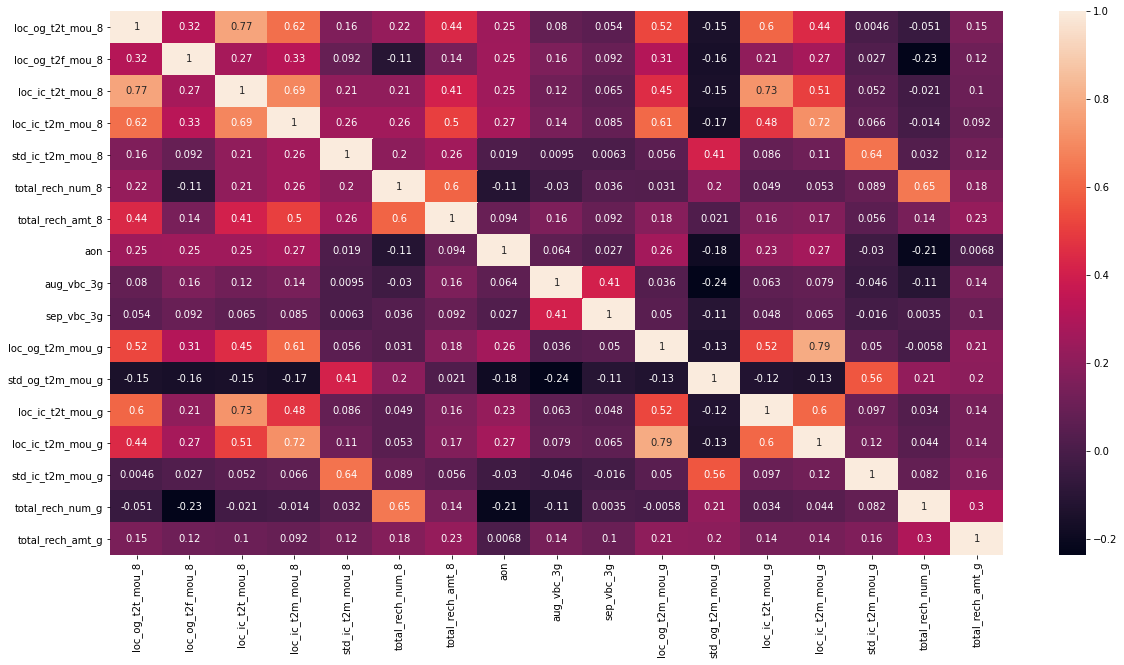

In [115]:
# To check the correlation among varibles
plt.figure(figsize=(20,10))
sns.heatmap(X_train[col].corr(),annot=True)

plt.show()

In [116]:
# Dropping column std_og_t2m_mou_g as its p-value = 0.713
col=col.drop('std_og_t2m_mou_g')

In [117]:
# Re-building the model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20990
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3991.2
Date:                Mon, 18 Jan 2021   Deviance:                       7982.4
Time:                        10:58:55   Pearson chi2:                 1.97e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.2937      0.046    -71.604      0.000      -3.384      -3.204
loc_og_t2t_mou_8    -0.0803      0.052     -1.531      0.126      -0.183       0.023
loc_og_t2f_mou_8    -0.1345      0.049     -2.758      0.006      -0.230      -0.039
loc_ic_t2t_mou_8    -0.3101      0.058     -5.392      0.000      -0.423      -0.197
loc_ic_t2m_mou_8    -0.7813      0.048    -16.312      0.000      -0.875      -0.687
std_ic_t2m_mou_8    -0.1519      0.043     -3.536      0.000      -0.236      -0.068
total_rech_num_8    -0.1651      0.049     -3.401      0.001      -0.260      -0.070
total_rech_amt_8    -0.3710      0.033    -11.133      0.000      -0.436      -0.306
aon                 -0.1617      0.034     -4.741      0.000      -0.229      -0.095
aug_vbc_3g          -0.1604      0.043     -3.730      0.000      -0.245      -0.076
sep_vbc_3g          -0.4655      0.074     -6.260      0.000      -0.611      -0.320
loc_og_t2m_mou_g    -0.0409      0.046     -0.879      0.379      -0.132       0.050
loc_ic_t2t_mou_g     0.1051      0.044      2.416      0.016       0.020       0.190
loc_ic_t2m_mou_g     0.2062      0.053      3.885      0.000       0.102       0.310
std_ic_t2m_mou_g     0.1111      0.038      2.923      0.003       0.037       0.186
total_rech_num_g     0.1296      0.039      3.300      0.001       0.053       0.207
total_rech_amt_g     0.2454      0.034      7.295      0.000       0.179       0.311
====================================================================================
"""

In [118]:
# Dropping column loc_og_t2m_mou_g as its p-value = 0.379
col=col.drop('loc_og_t2m_mou_g')

In [119]:
# Re-building the model
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20991
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3991.6
Date:                Mon, 18 Jan 2021   Deviance:                       7983.1
Time:                        10:58:56   Pearson chi2:                 1.97e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.2937      0.046    -71.604      0.000      -3.384      -3.204
loc_og_t2t_mou_8    -0.0929      0.050     -1.844      0.065      -0.192       0.006
loc_og_t2f_mou_8    -0.1373      0.049     -2.823      0.005      -0.233      -0.042
loc_ic_t2t_mou_8    -0.3028      0.057     -5.319      0.000      -0.414      -0.191
loc_ic_t2m_mou_8    -0.7823      0.048    -16.337      0.000      -0.876      -0.688
std_ic_t2m_mou_8    -0.1500      0.043     -3.494      0.000      -0.234      -0.066
total_rech_num_8    -0.1632      0.048     -3.365      0.001      -0.258      -0.068
total_rech_amt_8    -0.3708      0.033    -11.127      0.000      -0.436      -0.305
aon                 -0.1617      0.034     -4.743      0.000      -0.229      -0.095
aug_vbc_3g          -0.1573      0.043     -3.671      0.000      -0.241      -0.073
sep_vbc_3g          -0.4660      0.074     -6.273      0.000      -0.612      -0.320
loc_ic_t2t_mou_g     0.1030      0.043      2.373      0.018       0.018       0.188
loc_ic_t2m_mou_g     0.1770      0.041      4.290      0.000       0.096       0.258
std_ic_t2m_mou_g     0.1114      0.038      2.930      0.003       0.037       0.186
total_rech_num_g     0.1310      0.039      3.340      0.001       0.054       0.208
total_rech_amt_g     0.2412      0.033      7.243      0.000       0.176       0.307
====================================================================================
"""

In [120]:
# Dropping column loc_og_t2t_mou_8 as its p-value = 0.065
col=col.drop('loc_og_t2t_mou_8')

In [121]:
# Re-build the model
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20992
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3993.3
Date:                Mon, 18 Jan 2021   Deviance:                       7986.5
Time:                        10:58:56   Pearson chi2:                 1.97e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.2894      0.046    -71.771      0.000      -3.379      -3.200
loc_og_t2f_mou_8    -0.1505      0.048     -3.139      0.002      -0.244      -0.057
loc_ic_t2t_mou_8    -0.3481      0.051     -6.793      0.000      -0.449      -0.248
loc_ic_t2m_mou_8    -0.7961      0.047    -16.806      0.000      -0.889      -0.703
std_ic_t2m_mou_8    -0.1515      0.043     -3.528      0.000      -0.236      -0.067
total_rech_num_8    -0.1729      0.048     -3.581      0.000      -0.268      -0.078
total_rech_amt_8    -0.3759      0.033    -11.318      0.000      -0.441      -0.311
aon                 -0.1621      0.034     -4.758      0.000      -0.229      -0.095
aug_vbc_3g          -0.1517      0.043     -3.549      0.000      -0.235      -0.068
sep_vbc_3g          -0.4656      0.074     -6.270      0.000      -0.611      -0.320
loc_ic_t2t_mou_g     0.0936      0.043      2.170      0.030       0.009       0.178
loc_ic_t2m_mou_g     0.1801      0.041      4.362      0.000       0.099       0.261
std_ic_t2m_mou_g     0.1171      0.038      3.085      0.002       0.043       0.191
total_rech_num_g     0.1418      0.039      3.653      0.000       0.066       0.218
total_rech_amt_g     0.2364      0.033      7.126      0.000       0.171       0.301
====================================================================================
"""

In [122]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,loc_ic_t2m_mou_8,4.33
1,loc_ic_t2t_mou_8,3.66
4,total_rech_num_8,3.45
10,loc_ic_t2m_mou_g,3.22
9,loc_ic_t2t_mou_g,3.02
12,total_rech_num_g,2.55
5,total_rech_amt_8,2.50
3,std_ic_t2m_mou_8,1.99
11,std_ic_t2m_mou_g,1.86
13,total_rech_amt_g,1.29


Both p-value and VIF are within the range and we can proceed with the prediction using logm4 model.

In [123]:
# predicting the y train values
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred

array([0.12636336, 0.00286516, 0.01977857, ..., 0.03853812, 0.06710827,
       0.01055656])

In [124]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values.reshape(-1), 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Conv_Prob,CustID
0,0,0.126363,4715
1,0,0.002865,15222
2,0,0.019779,60145
3,0,0.070809,62445
4,0,0.034607,88349


In [125]:
# Method to draw ROC-curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [126]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

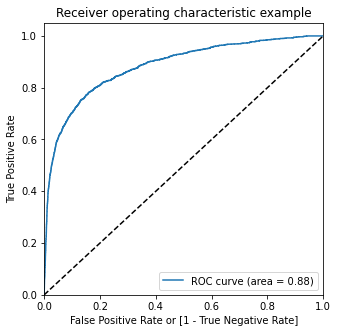

In [127]:
# Calling the method to draw the ROC-Curve
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [128]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conv_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.126363,4715,1,1,0,0,0,0,0,0,0,0
1,0,0.002865,15222,1,0,0,0,0,0,0,0,0,0
2,0,0.019779,60145,1,0,0,0,0,0,0,0,0,0
3,0,0.070809,62445,1,0,0,0,0,0,0,0,0,0
4,0,0.034607,88349,1,0,0,0,0,0,0,0,0,0


In [129]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.086781  1.000000  0.000000
0.1   0.1  0.872519  0.724081  0.886624
0.2   0.2  0.918170  0.614920  0.946987
0.3   0.3  0.928262  0.546901  0.964502
0.4   0.4  0.932403  0.500274  0.973467
0.5   0.5  0.934117  0.437740  0.981286
0.6   0.6  0.933498  0.365880  0.987437
0.7   0.7  0.927024  0.238069  0.992494
0.8   0.8  0.918741  0.090510  0.997446
0.9   0.9  0.913648  0.006034  0.999896


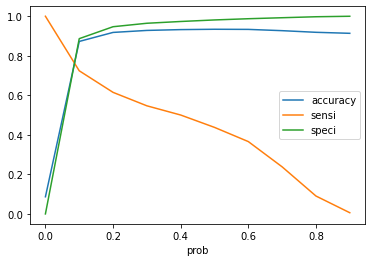

In [130]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [131]:
# using the 0.1 cut off, creating the new column final_predicted
y_train_pred_final['final_predicted'] = y_train_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.1 else 0)

y_train_pred_final.head()

,Converted,Conv_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.126363,4715,1,1,0,0,0,0,0,0,0,0,1
1,0,0.002865,15222,1,0,0,0,0,0,0,0,0,0,0
2,0,0.019779,60145,1,0,0,0,0,0,0,0,0,0,0
3,0,0.070809,62445,1,0,0,0,0,0,0,0,0,0,0
4,0,0.034607,88349,1,0,0,0,0,0,0,0,0,0,0


In [132]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8725186842481077

In [133]:
# Finding confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[17009,  2175],
       [  503,  1320]], dtype=int64)

In [134]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [135]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7240811848601206

In [136]:
# Let us calculate specificity
TN / float(TN+FP)

0.8866242702251876

#### Prediction on Test Set

In [137]:
# Scaling the test set using StandardScaler
X_test[X_test.columns]=scaler.transform(X_test[X_test.columns])

In [138]:
# Using columns selected in RFE for test set
X_test = X_test[col]
X_test.head()

,loc_og_t2f_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,std_ic_t2m_mou_8,total_rech_num_8,total_rech_amt_8,aon,aug_vbc_3g,sep_vbc_3g,loc_ic_t2t_mou_g,loc_ic_t2m_mou_g,std_ic_t2m_mou_g,total_rech_num_g,total_rech_amt_g
29360,-0.561175,0.065846,0.533119,1.119142,-2.274190,-3.251692,-0.637851,-0.549531,-0.259948,0.585507,0.541266,1.012682,1.130190,0.233455
49979,-0.561175,-2.540105,-2.095716,0.345379,-0.674527,-0.014436,-0.117882,-0.549531,-0.259948,0.084219,-0.657719,1.511818,-0.550555,0.467862
90612,1.085945,-0.420079,0.627469,-0.951253,-0.206656,0.394379,1.463211,1.809205,-0.259948,-0.832415,0.472391,-0.805521,-0.803446,-0.585797
87007,1.047684,-0.051609,0.849218,-1.008488,1.828372,0.295308,1.221667,-0.549531,-0.259948,0.042656,1.026165,0.211799,1.864025,-0.033340
91852,-0.561175,-0.098201,0.488184,-1.100334,0.492772,0.006451,-0.573052,1.796281,-0.259948,-0.064038,0.744235,-0.182319,0.586584,-1.285649


In [139]:
# Add the constant
X_test_sm = sm.add_constant(X_test)
# Predict the test set
y_test_pred = res.predict(X_test_sm)

In [140]:
y_pred_final = pd.DataFrame({'Churn':y_test.values.reshape(-1), 'Churn_Prob':y_test_pred})
y_pred_final['CustID'] = y_test.index
y_pred_final.head()

,Converted,Conv_Prob,CustID
29360,0,0.195902,29360
49979,0,0.435320,49979
90612,0,0.010938,90612
87007,0,0.019783,87007
91852,0,0.025263,91852


In [141]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)

In [142]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.8762772101288316

In [143]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[7320,  914],
       [ 200,  570]], dtype=int64)

In [144]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [145]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7402597402597403

In [146]:
# Let us calculate specificity
TN / float(TN+FP)

0.8889968423609425

**Logistic Regression:**
1. Train Set:
    - Accuracy: 87.25%
    - Sensitivity: 72.40%
    - Specificity: 88.66%
2. Test Set:
    - Accuracy: 87.63%
    - Sensitivity: 74.03%
    - Specificity: 88.90%

#### High Performance Model with PCA:

In [147]:
# import package for PCA
from sklearn.decomposition import PCA

In [148]:
# Instantiate PCA object
pca = PCA(random_state=42)

In [149]:
df_p=df_hvc.copy()

In [150]:
# Capping the outliers with 2%
for p in df_p.columns[:-1]:
    a=df_p[p].quantile(0.98)
    df_p[p][df_p[p]>a] = a   

In [151]:
# Dropping highly correlated variables
df_p.drop(columns=['roam_ic_mou_6','roam_og_mou_6','loc_og_t2c_mou_6','std_og_t2f_mou_6','isd_og_mou_6','og_others_6','std_ic_t2f_mou_6','spl_ic_mou_6','isd_ic_mou_6','ic_others_6','max_rech_amt_6','vol_2g_mb_6','vol_3g_mb_6'],inplace=True)
df_p.drop(columns=['roam_ic_mou_7','roam_og_mou_7','loc_og_t2c_mou_7','std_og_t2f_mou_7','isd_og_mou_7','og_others_7','std_ic_t2f_mou_7','spl_ic_mou_7','isd_ic_mou_7','ic_others_7','max_rech_amt_7','vol_2g_mb_7','vol_3g_mb_7'],inplace=True)
df_p.drop(columns=['roam_ic_mou_8','roam_og_mou_8','loc_og_t2c_mou_8','std_og_t2f_mou_8','isd_og_mou_8','og_others_8','std_ic_t2f_mou_8','spl_ic_mou_8','isd_ic_mou_8','ic_others_8','max_rech_amt_8','vol_2g_mb_8','vol_3g_mb_8'],inplace=True)

In [152]:
# Deriving the variables
for i in df_p.columns[df_p.columns.str.endswith('6')]:
    df_p[i[:-1]+'g']=(df_p[i[:-1]+'6']+df_p[i[:-1]+'7'])/2

In [153]:
# Dropping variables from which derived variables are derived
df_p.drop(columns=df_p.columns[df_p.columns.str.endswith('6')],inplace=True)
df_p.drop(columns=df_p.columns[df_p.columns.str.endswith('7')],inplace=True)

In [154]:
# Chekcing the data set
df_p.head()

,onnet_mou_8,offnet_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_mou_8,spl_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_mou_8,total_ic_mou_8,total_rech_num_8,total_rech_amt_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,onnet_mou_g,offnet_mou_g,loc_og_t2t_mou_g,loc_og_t2m_mou_g,loc_og_t2f_mou_g,loc_og_mou_g,std_og_t2t_mou_g,std_og_t2m_mou_g,std_og_mou_g,spl_og_mou_g,total_og_mou_g,loc_ic_t2t_mou_g,loc_ic_t2m_mou_g,loc_ic_t2f_mou_g,loc_ic_mou_g,std_ic_t2t_mou_g,std_ic_t2m_mou_g,std_ic_mou_g,total_ic_mou_g,total_rech_num_g,total_rech_amt_g
7,52.29,325.91,40.28,162.28,53.23,255.79,12.01,49.14,77.84,6.50,350.16,27.31,121.19,39.53,188.04,30.39,141.33,193.940,428.74,7,1957.8,802,57.74,19.38,18.74,0.0,1,56.260,510.295,41.385,378.005,58.635,478.035,13.795,40.825,68.000,2.25,548.385,45.200,219.525,116.760,391.555,24.360,109.215,176.810,592.250,5.0,1185.0
8,35.08,136.48,12.49,50.54,0.00,63.04,22.58,75.69,98.28,10.23,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.750,16.54,14,120.0,315,21.03,910.65,122.16,0.0,0,382.360,87.645,257.360,75.770,0.000,333.135,124.995,11.865,136.870,0.00,470.010,16.840,35.780,0.000,52.630,0.290,13.255,13.545,66.175,20.0,519.0
13,534.24,482.46,36.01,294.46,23.51,353.99,498.23,156.94,655.18,4.78,1015.26,52.58,195.18,7.49,255.26,131.28,234.79,362.844,1144.53,11,717.0,2607,0.00,0.00,0.00,0.0,0,305.075,266.295,27.910,99.205,2.270,129.395,266.195,154.150,420.355,0.00,549.750,37.730,80.705,2.405,120.845,76.985,137.488,217.898,570.595,5.0,380.0
16,70.61,162.76,67.38,128.28,10.26,205.93,3.23,18.29,21.53,5.91,233.38,28.89,150.16,32.71,211.78,6.33,73.93,82.440,294.46,2,160.0,511,0.00,2.45,21.89,0.0,0,62.260,263.015,53.885,209.640,2.240,265.775,5.235,43.750,48.990,1.63,316.410,56.385,188.250,8.695,253.345,73.715,45.880,119.860,373.210,8.0,459.0
17,7.79,5.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,4,30.0,667,0.00,0.00,0.00,0.0,0,597.595,30.820,19.495,29.270,0.000,48.770,573.860,0.775,574.635,1.29,625.170,17.270,24.860,0.000,42.135,4.315,0.640,4.955,47.095,10.5,408.0


In [155]:
#log transformation
for i in df_p.drop(columns='churn').columns:
    df_p[i]=np.log(df_p[i])

In [156]:
# after conversion, log(0) value converted to -inf, so replacing that value 0

for i in df_p.drop(columns='churn').columns:
    df_p.loc[df_p[i]==np.log(0),i]=0


#### Scaling

In [157]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [158]:
X = df_p.drop(columns='churn')
y = df_p.pop('churn')

In [159]:
y.reset_index(drop=True,inplace=True)

In [160]:
y

0        1
1        0
2        0
3        0
4        0
        ..
30006    0
30007    0
30008    0
30009    0
30010    0
Name: churn, Length: 30011, dtype: int64

In [161]:
x = scaler.fit_transform(X)

In [162]:
x

array([[-0.1628485 ,  0.40657151,  0.35488924, ...,  0.97768726,
        -1.10566744,  1.61852133],
       [-0.36371353, -0.09131045, -0.2634511 , ..., -0.83173377,
         1.17502238, -0.4503569 ],
       [ 1.00661237,  0.6309486 ,  0.2957137 , ...,  0.94693411,
        -1.10566744, -1.23153593],
       ...,
       [ 1.19407852,  0.7512961 ,  1.77815939, ...,  0.99048912,
        -0.55211343,  0.78147182],
       [-1.70095683,  0.25106961, -1.12145435, ...,  1.10017573,
         0.33462741, -0.71491914],
       [-2.15391955, -2.9032991 , -1.59680951, ..., -2.82054709,
        -1.69245834, -1.30175327]])

In [163]:
# Applying PCA on the data
pca.fit(x)

PCA(random_state=42)

In [164]:
# Displaying the PCA components
pca.components_

array([[-1.59555471e-01, -2.00948720e-01, -2.19544225e-01, ...,
        -2.13129859e-01, -1.76496682e-02, -7.89389934e-02],
       [ 1.51840875e-01,  9.24694382e-02, -5.10778087e-02, ...,
        -5.27321474e-02,  1.11973347e-01,  6.77875651e-02],
       [ 6.91713586e-02,  1.29765636e-01,  2.22780210e-02, ...,
        -1.68592046e-01, -6.79954748e-02, -2.36036473e-02],
       ...,
       [-4.76368303e-03,  2.06911290e-02, -9.35921541e-02, ...,
         1.31392089e-01,  1.48887232e-03, -5.45898998e-03],
       [ 5.96020402e-03,  4.35954349e-02, -9.71157030e-02, ...,
         1.44674234e-01, -2.43558139e-03,  2.31149151e-03],
       [ 3.24286900e-03,  2.56972586e-02, -9.49711447e-02, ...,
        -1.25973759e-01,  1.08587790e-03,  1.29190934e-04]])

In [165]:
# Variance Ratio
pca.explained_variance_ratio_

array([2.69906918e-01, 1.79902761e-01, 7.15490591e-02, 6.87236964e-02,
       4.86504769e-02, 4.42226550e-02, 3.64700958e-02, 3.02529322e-02,
       2.35298638e-02, 2.05889081e-02, 2.02336488e-02, 1.70071100e-02,
       1.67650604e-02, 1.33851721e-02, 1.26644928e-02, 1.16690073e-02,
       1.13636159e-02, 1.11581133e-02, 8.97229228e-03, 8.63163772e-03,
       7.14168677e-03, 7.01946990e-03, 6.03800002e-03, 5.41131344e-03,
       5.08945336e-03, 4.76302403e-03, 4.52228082e-03, 4.46807202e-03,
       3.66117512e-03, 3.24306309e-03, 2.90710833e-03, 2.84027980e-03,
       2.82053696e-03, 2.24526881e-03, 1.91271065e-03, 1.85377745e-03,
       1.65932456e-03, 1.36685022e-03, 1.14653536e-03, 1.03243655e-03,
       8.19825723e-04, 7.44811599e-04, 5.13757586e-04, 3.94054596e-04,
       3.80524487e-04, 2.05880540e-04, 1.51262006e-04])

<BarContainer object of 47 artists>

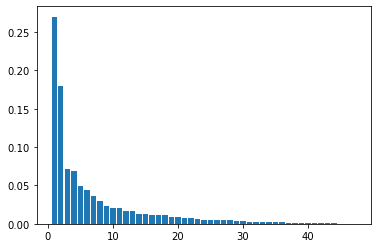

In [166]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [167]:
# Cumulative sum of variance ratio
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.26990692, 0.44980968, 0.52135874, 0.59008243, 0.63873291,
       0.68295557, 0.71942566, 0.74967859, 0.77320846, 0.79379737,
       0.81403101, 0.83103812, 0.84780318, 0.86118836, 0.87385285,
       0.88552186, 0.89688547, 0.90804359, 0.91701588, 0.92564752,
       0.9327892 , 0.93980867, 0.94584667, 0.95125799, 0.95634744,
       0.96111046, 0.96563274, 0.97010082, 0.97376199, 0.97700505,
       0.97991216, 0.98275244, 0.98557298, 0.98781825, 0.98973096,
       0.99158474, 0.99324406, 0.99461091, 0.99575745, 0.99678988,
       0.99760971, 0.99835452, 0.99886828, 0.99926233, 0.99964286,
       0.99984874, 1.        ])

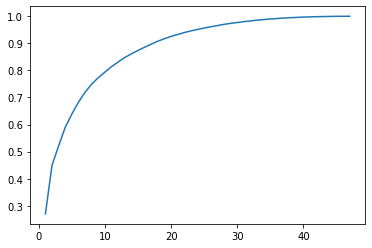

In [168]:
# Finding optimal number of components
plt.plot(range(1,len(var_cumu)+1), var_cumu)

In [169]:
# With number of components of 12 instantiating the PCA object
pc2 = PCA(n_components=12, random_state=42)

In [170]:
# Fitting the data and storing it in new dataframe
newdata = pc2.fit_transform(x)

In [171]:
# Cjheckign the shape of new dataframe
newdata.shape

(30011, 12)

In [172]:
# Renaming the columns
df = pd.DataFrame(newdata, columns=["PC1", "PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11","PC12"])
df.shape

(30011, 12)

In [173]:
# Concating the Dependent variable
df_final = pd.concat([df, y], axis=1)

In [174]:
# Checking the shape of the dataframe
df_final.shape

(30011, 13)

#### 1. Logistic Regression with PCA

In [175]:
#Spliting Independent - X and Dependent variables -y
X=df_final.drop(columns=['churn'])
y=df_final['churn']

In [176]:
y.shape

(30011,)

In [177]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


In [178]:
# Logistic regression model
X_train_sm = sm.add_constant(X_train)
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20994
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4051.7
Date:                Mon, 18 Jan 2021   Deviance:                       8103.5
Time:                        10:59:03   Pearson chi2:                 1.93e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.1776      0.041    -77.231      0.000      -3.258      -3.097
PC1            0.3076      0.008     38.206      0.000       0.292       0.323
PC2            0.0711      0.012      5.918      0.000       0.048       0.095
PC3           -0.3713      0.015    -24.671      0.000      -0.401      -0.342
PC4            0.1386      0.018      7.506      0.000       0.102       0.175
PC5            0.0854      0.023      3.752      0.000       0.041       0.130
PC6            0.0429      0.020      2.104      0.035       0.003       0.083
PC7            0.0627      0.025      2.498      0.012       0.014       0.112
PC8           -0.0193      0.029     -0.656      0.512      -0.077       0.038
PC9            0.0580      0.030      1.931      0.053      -0.001       0.117
PC10           0.1997      0.031      6.420      0.000       0.139       0.261
PC11           0.0600      0.032      1.859      0.063      -0.003       0.123
PC12          -0.1907      0.037     -5.184      0.000      -0.263      -0.119
==============================================================================
"""

In [179]:
# predicting the y train values
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred

array([0.09750412, 0.00893427, 0.02021013, ..., 0.04414754, 0.06318229,
       0.00864624])

In [180]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values.reshape(-1), 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Conv_Prob,CustID
0,0,0.097504,1434
1,0,0.008934,4636
2,0,0.020210,17998
3,0,0.038620,18683
4,0,0.067833,26470


In [181]:
# Method to draw ROC-Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [182]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

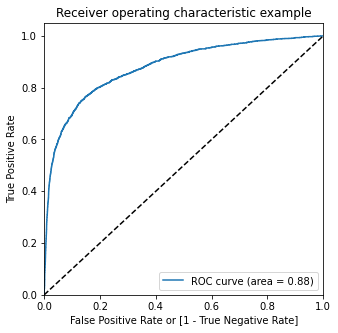

In [183]:
# Calling the method to plot ROC-curve
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [184]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conv_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.097504,1434,1,0,0,0,0,0,0,0,0,0
1,0,0.008934,4636,1,0,0,0,0,0,0,0,0,0
2,0,0.020210,17998,1,0,0,0,0,0,0,0,0,0
3,0,0.038620,18683,1,0,0,0,0,0,0,0,0,0
4,0,0.067833,26470,1,0,0,0,0,0,0,0,0,0


In [185]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.086781  1.000000  0.000000
0.1   0.1  0.879183  0.705979  0.895642
0.2   0.2  0.917266  0.604498  0.946987
0.3   0.3  0.928310  0.544158  0.964814
0.4   0.4  0.932118  0.496434  0.973520
0.5   0.5  0.933546  0.441031  0.980348
0.6   0.6  0.931547  0.358749  0.985978
0.7   0.7  0.927120  0.246297  0.991816
0.8   0.8  0.918218  0.078442  0.998019
0.9   0.9  0.913267  0.000549  1.000000


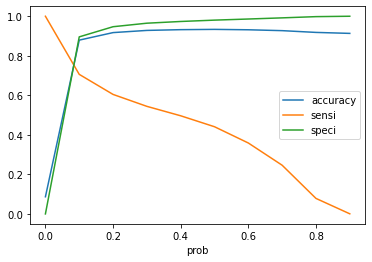

In [186]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**Hey where is the prediction for test set?**

#### 2. Random Forest with PCA:

In [272]:
# Method to Evaluate the model
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("Train Recall :", recall_score(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))
    print("Test Recall :", recall_score(y_test, dt_classifier.predict(X_test)))

In [189]:
# Import Package for RandomForestCLassifier
from sklearn.ensemble import RandomForestClassifier

In [190]:
# Instantiate the Object
rf = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=3)

In [191]:
# Fit the model
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

In [192]:
# Finding estimator
rf.estimators_[0]

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1608637542)

In [193]:
sample_tree = rf.estimators_[4]

In [265]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1,class_weight='balanced')

In [266]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4,8],
    'n_estimators': [10, 30, 50, 100]
}

In [267]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "recall")

In [268]:
# Fit the grid search model
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 400 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 474 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done 824 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1274 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed:  6.1min finished


Wall time: 6min 8s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4, 8],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100]},
             scoring='recall', verbose=1)

In [269]:
rf_best = grid_search.best_estimator_

In [270]:
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=8,
                       min_samples_leaf=100, n_estimators=10, n_jobs=-1,
                       random_state=42)

In [273]:
# Evaluate the Model
evaluate_model(rf_best)

Train Accuracy : 0.8754700814014376
Train Confusion Matrix:
[[16990  2194]
 [  422  1401]]
Train Recall : 0.7685134393856281
--------------------------------------------------
Test Accuracy : 0.8743891603731675
Test Confusion Matrix:
[[7292  942]
 [ 189  581]]
Test Recall : 0.7545454545454545


**Random Forest with PCA:**
1. Train Set:
    - Accuracy: 87.55%
    - Sensitivity: 76.85%
2. Test Set:
    - Accuracy: 87.44%
    - Sensitivity: 75.45%

#### 3. XGBoost

In [278]:
# Import packages for XGBoost
import xgboost as xgb
from sklearn import metrics

# Object instantiation
xgclf = xgb.XGBClassifier(class_weight='balanced')

# Fit the model
xgclf.fit(X_train, y_train)

[13:00:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:00:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [280]:
# 1st-Run for best hyperparameters
parameters = {'learning_rate': [0.1, 0.2],
              'max_depth': [2, 4, 6, 8],
              'min_child_weight': [3, 7, 11, 19],
              'n_estimators': [50, 100]}


clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=3,
                                       scoring='recall',
                                       refit=True)

clf_xgb.fit(X_train, y_train)

[13:06:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [281]:
# Finding best estimator
xg_best=clf_xgb.best_estimator_

In [282]:
# Displaying the best estimator
xg_best

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [283]:
# Evaluating the model
evaluate_model(xg_best)

Train Accuracy : 0.9405436283143714
Train Confusion Matrix:
[[18851   333]
 [  916   907]]
Train Recall : 0.4975315414152496
--------------------------------------------------
Test Accuracy : 0.9406930253220791
Test Confusion Matrix:
[[8094  140]
 [ 394  376]]
Test Recall : 0.4883116883116883


In [284]:
# Fitting the model with best estimator
final_model = xgb.XGBClassifier(learning_rate=0.1,
                                max_depth=4,
                                min_child_weight=7,
                                n_estimators=100)

final_model.fit(X_train, y_train)
print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_train,
                                                              y_score=final_model.predict_proba(X_train)[:, 1]))

print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=final_model.predict_proba(X_test)[:, 1]))

[13:10:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC on train data by XGBoost = 0.9257091986053472
AUC on test data by XGBoost = 0.8919777514203066


**XGBoost:**
1. Train Set:
    - Accuracy: 94.05%
    - Sensitivity: 49.75%
    - AUC: 92.57%
2. Test Set:
    - Accuracy: 94.06%
    - Sensitivity: 48.83%
    - AUC: 89.19%

**Final Conclusion:**
- We have created 4 models to predict the customer churn:
    1. Interpretable Model without PCA: Logistic Regression
    2. High Performance Model with PCA: Logistic Regression, Random Forest and XGBoost.
- Since we are concerned with customer churn, the metric choosen to find the best model is the Sensitivity Metric and hence, out of all four models, the best model for predicting the customer churn is Random Forest with PCA with following statistics:
    1. Train Set:
        - Accuracy: 87.55%
        - Sensitivity: 76.85%
    2. Test Set:
        - Accuracy: 87.44%
        - Sensitivity: 75.45%
- Top 5 important Predictors and their absolute co-efficient values:
    1. loc_ic_t2m_mou_8: 0.7961
    2. sep_vbc_3g:       0.4656
    3. total_rech_amt_8: 0.3759
    4. loc_ic_t2t_mou_8: 0.3481
    5. total_rech_amt_g: 0.2364
    6. loc_ic_t2m_mou_g: 0.1801
- Strategies to manage customer churn: 
    - From the top predictors it looks like amount of recharge is an important parameter and hence the telecom operator can provide better and attractive recharge packages and offers to retain the churn customers.